# 概述

羊群效应通常来说，是由于个别股票的暴涨或暴跌引起其他相关股票收 益率联动，致某类股票暴涨或暴跌。因此，通俗来说，羊群效应刻画的
是个股之间联动性的变化，并于此对趋势强度进行判断。

# CCK模型

CCK模型由Chang, Cheng & Khorana 在 2000 年提出，其核心思想是通 过组合成分股收益率相对于市场收益率Rm离散程度的变化识别羊群效 应的发生。

Chang, Cheng & Khorana 首先通过以下推导证明了理性情况下，由于个 股对市场风险的敏感程度不同，市场收益率Rm剧烈波动时，组合收益 率相对于Rm的离散程度会线性增加;

定义股票组合在t时刻的截面绝对离散度$CSAD_t$为

<center>$$CSAD_t=\frac{1}{N}\sum_{i=1}^N|R_{i,t}-R_{m,t}|$$</center>

根据CAPM，有：

<center>$$E(R_{i,t})=\gamma_0+\beta_iE(R_{m,t}-\gamma_0)$$</center>
    
则期望$CSAD_t$,即$E(CSAD_T)$为

<center>$$E(CASD_t)=E(\frac{1}{N}\sum_{i=1}^N|R_{i,t}-R_{m,t}|)$$</center>
<center>$=\frac{1}{N}(\sum_{i=1}^N|E(R_{i,t})-E(R_{m,t})|)$</center>
<center>$=\frac{1}{N}(\sum_{i=1}^N|\gamma_0+\beta_iE(R_{i,t})-(\gamma_0+\beta_mE(R_{m,t}))|)$</center>
<center>$=\frac{1}{N}\sum_{i=1}^N|\beta_i-\beta_m|E(R_{m,t}-\gamma)$</center>

对$E(CSAD_t)$求一，二阶导数，有

<center>$$\frac{\delta E(CSAD_t)}{\delta E(R_{m,t})}=\frac{1}{N}\sum_{i=1}^N|\beta_i-\beta_m|>0$$</center>
<center>$$\frac{\delta^2 E(CSAD_t)}{\delta E(R_{m,t})^2=0}$$</center>

一阶导数为正，二阶导数为零，说明理性情况，即无羊群效应时，$CSAD_t$和$R_m$的关系为线性正相关。

而存在羊群效应时，$CSAD_t$和$R_m$的线性正相关系数会被大破。基于这一思想，Chang,Cheng&Khorana构造了如下回归，根据回归中$R_{m,t}^2$的系数$\beta_2$是否显著为负判断是否存在羊群效应:$\beta_2$显著时，说明$CSAD_t$和$R_m$的关系为非线性；$\beta_2$为负时，随$R_m$增大，离散程度会减速上升或加速下降。减速上升说明$CSAD_t$上升幅度低于理想情况(理性情况匀速上升)，离散度加速下降更表明$CSAD_t$和$R_m$间存在强负相关关系。因此，$R_{m,t}^2$的系数$\beta_2$显著为负时说明羊群效应发生。

<center>$CSAD_t=\alpha+\beta_1|R_{m,t}|+\beta_2R_{m,t}^2+\epsilon_t$

# 模型改进

CCK模型的所有因变量均基于市场收益率$R_m$构建，也即模型将市场作 为羊群效应的唯一驱动因素，但在真实市场中，风格、行业等多种因素 均会引起羊群效应，因此，模型变量可能需要根据市场实际情况进行调 整。接下来，我们将重点比较由不同驱动因素驱动的羊群所引起趋势的
相对强弱，并据此决定策略的具体调整方式。

从驱动因素的重要性出发，本文将主要探究市场驱动的羊群效应、市值 风格驱动的羊群效应发生后的市场：我们以 22 交易日（一个月，包括 当日）为滚动期，每天计算向前 22 交易日其上证 50 成分股组合截面绝
对离散度CSAD，估计以下两个模型的参数：

<center>$CSAD_t=\alpha+\beta_1|R_{m,t}|+\beta_2R_{m,t}^2+\epsilon_t$</center>
<center>$CSAD_t=\alpha+\beta_1|R_{smb,t}|+\beta_2 R_{smb,t}^2+\epsilon_t$</center>

其中，$R_{m,t}$指数收益率，$R_{smb,t}$为市值因子收益率，当对应二次项系数显著为负时，则发生了由该因素驱动的羊群效应。我们以滚动期内指 数平均日收益率的正负区分市场趋势为上涨还是下跌，上涨状态下各指数收盘价与羊群效应发生时间如下图所示。从图中可以看出：

1. 羊群效应产生于趋势，作用于趋势，信号发出前后市场趋势明显。
2. 多数趋势波段由市场、市值风格共同驱动，少数波段为单一因素驱动；
3. 市场与市值风格多个“驱动力”共同驱动的羊群效应发生后，趋势更强：2018-2019 年间的羊群效应由市场或市值风格单个因素驱动，期间指数趋势较弱，甚至出现反转，其他年份则多由市场与市值风格共同作用，期间指数趋势更强。

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
from jqdata import *
from jqfactor import *
import datetime as dt
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from IPython.core.display import HTML

# 设置字体 用来正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False
# 图表主题
plt.style.use('ggplot')

# 忽略报错
import warnings
warnings.filterwarnings("ignore")

In [2]:
start = '2014-01-01'
end = '2019-08-31'
interval = 22

# 数据获取函数

In [3]:
# 1 获取指数成分股
# 过滤ST；过滤上市不足三个月=>filter_now_share；过滤当日停牌股票=>filter_paused_stocks
def filter_index_stocks(index_code, trade_date):
    # 获取成分股列表
    stocks = get_index_stocks(index_code, date=trade_date)
    # 剔除ST股
    st_stocks = get_extras('is_st', stocks, count=1, end_date=trade_date)
    stockList = [stock for stock in st_stocks if not st_stocks[stock][0]]

    # 剔除上市不足三月股票
    stockList = filter_now_share(stockList, trade_date)
    # 剔除当日停牌股票
    stockList = filter_paused_stocks(stockList, trade_date)
    return stockList


# 2 过滤上市不足3月的股票
def filter_now_share(stocks, begin_date, n=3 * 30):
    stockList = []
    # 如果begin_date
    if type(begin_date) == str:
        begin_date = dt.datetime.strptime(begin_date, "%Y-%m-%d").date()
    for stock in stocks:
        start_date = get_security_info(stock).start_date
        if start_date < (begin_date - dt.timedelta(days=n)):
            stockList.append(stock)
    return stockList


# 3 过滤当日停牌股票
def filter_paused_stocks(stockList, begin_date):
    is_paused = get_price(stockList,
                          end_date=begin_date,
                          count=1,
                          fields='paused')['paused'].T
    unsuspened_stocks = is_paused[is_paused.iloc[:, 0] < 1].index.tolist()
    return unsuspened_stocks



# 4 获取基础数据
'''
index_code：为成分股代码
start,end：str 日期
interval为N日收益率
file_name:储存文件的文件名
------------------------
实际运行时数据日期会在start向前推interval日
return dict key['close','smb'] value:df index为date,columns为股票代码
'''


def get_datas(index_code, start, end, interval, file_name):

    # 向前推N日
    begin = get_trade_days(end_date=start, count=interval)[0]
    # 获取交易日利
    trade_list = get_trade_days(start_date=begin, end_date=end)

    datas = {}
    stock_df = []
    smb_list = []

    for date in trade_list:
        # 获取股票列表
        stocksList = filter_index_stocks(index_code, date)

        # 获取close数据
        stocks = get_price(stocksList, end_date=date, count=1,
                           fields='close')['close']
        stock_df.append(stocks)

        # 获取smb数据
        q = query(valuation.code, valuation.day,
                  valuation.circulating_market_cap).filter(
                      valuation.code.in_(stocksList))
        smb = get_fundamentals(q, date=date)
        # 单位亿元
        smb = smb.pivot(index='day',
                        columns='code',
                        values='circulating_market_cap')
        smb_list.append(smb)

        print('success', date.strftime('%Y-%m-%d'))
    # 合并数据
    close_df = pd.concat(stock_df)
    smb_df = pd.concat(smb_list)
    datas['close'] = close_df
    datas['smb'] = smb_df
    # 存储数据
    pkl_file = open(file_name, 'wb')
    pickle.dump(datas, pkl_file)
    print('以储存数据：' + file_name)
    return datas


# 5 获取信号
'''
datas_df：成分股数据，index为日期，columns为代码
interval为间隔N日收益率,22为月收益率
file_name:储存文件的文件名
------------------------
实际运行时数据日期会在start向前推interval日
return df
'''


def get_factor(dic, index_code, interval):

    stocks = dic['close']
    smb_df = dic['smb']
    # 获取日期
    begin = min(hs300_datas['close'].index).strftime('%Y-%m-%d')
    end = max(hs300_datas['close'].index).strftime('%Y-%m-%d')

    index_close = get_price(index_code,
                            start_date=begin,
                            end_date=end,
                            fields='close')['close']
    # 成分股
    # N-1实际为22日得收益率
    stock_ret = stocks.pct_change(interval - 1)
    stock_ret = stock_ret[interval - 1:]

    smb_ret = smb_df.pct_change(interval - 1)
    smb_ret = smb_ret[interval - 1:]
    # 指数
    index_Nret = index_close.pct_change(interval - 1)
    index_Nret = index_Nret[interval - 1:]
    # 指数日收益率
    index_ret = index_close.pct_change()
    index_ret = index_ret[interval - 1:]
    # 指数收盘价
    index_close = index_close[interval - 1:]

    # 将指数的一维数据转为与成分股相同的矩阵相减
    ret_diff_arr = stock_ret.values - np.broadcast_to(
        np.expand_dims(index_Nret.values, axis=1), (stock_ret.values.shape))
    smb_diff_arr = smb_ret.values - np.broadcast_to(
        np.expand_dims(index_Nret.values, axis=1), (smb_ret.values.shape))
    # 计算CSAD
    csad_arr = np.nansum(abs(ret_diff_arr), axis=1) / np.count_nonzero(
        ret_diff_arr, axis=1)
    csad_smb = np.nansum(abs(smb_diff_arr), axis=1) / np.count_nonzero(
        smb_diff_arr, axis=1)
    # 收益绝对值
    ret_arr = abs(stock_ret.values)
    smb_arr = abs(smb_ret.values)
    # 收益方
    ret_2_arr = ret_arr**2
    smb_2_arr = smb_arr**2
    # 回归
    temp = []
    for i in range(len(stock_ret)):
        trade_date = stock_ret.index[i]
        X_a = np.nan_to_num(np.c_[ret_arr[i], ret_2_arr[i]])
        Y_a = np.broadcast_to(np.expand_dims(csad_arr[i], axis=0),
                              (len(X_a), 1))
        beta = np.linalg.lstsq(X_a, Y_a)[0][1][0]  # 获取回归系数，最小二乘法

        X_b = np.nan_to_num(np.c_[smb_arr[i], smb_2_arr[i]])
        Y_b = np.broadcast_to(np.expand_dims(csad_smb[i], axis=0),
                              (len(X_b), 1))
        beta_smb = np.linalg.lstsq(X_b, Y_b)[0][1][0]

        r_score = cal_score(beta, index_Nret[i])
        smb_score = cal_score(beta_smb, index_Nret[i])

        temp.append([
            beta, beta_smb, index_Nret[i], index_ret[i], index_close[i],
            beta < 0 and index_Nret[i] > 0, beta < 0 and index_Nret[i] < 0,
            beta_smb < 0 and index_Nret[i] < 0, r_score, smb_score
        ])

    # 列名
    column_name = [
        'r_csad', 'smb_csad', 'index_Nret', '当日涨幅', 'close', 'r_up_singal',
        'r_down_singal', 'smb_singal', 'r_factor', 'smb_factor'
    ]
    # 构建df
    factor_df = pd.DataFrame(temp, columns=column_name, index=stock_ret.index)
    # 存储数据
    #pkl_file=open(file_name,'wb')
    #pickle.dump(factor,pkl_file)
    #print('以储存数据：'+file_name)
    return factor_df


# 5-1 将CSAD和指数收益合成打分
def cal_score(csad, ret):
    if csad < 0 and ret > 0:
        score = csad + ret
    else:
        score=abs(csad)+abs(ret)
    return score

# 回测用函数

In [4]:
# 6 回测函数
'''
输入：df index为日期,singal_col为df中含信号得列名
---------------
总体逻辑是有信号则买入持有，无信号则平仓
'''


def back_test(df, singal_col,holding=None, prt=False):
    position = []

    if holding == None:
        for i in range(len(df)):
            factor_value = df[singal_col][i]
            if factor_value:
                position.append(1)
            else:
                position.append(0)
    else:
        count = holding
        for i in range(len(df)):
            factor_value = df[singal_col][i]
            if factor_value:
                position.append(1)
                count = 1
            else:
                if count < holding:
                    count += 1
                    position.append(1)
                else:
                    position.append(0)

    df['position'] = position
    if prt:
        position = np.array(position)
        print('满仓天数：', len(position[position == 1]))
        print('空仓天数：', len(position[position == 0]))
    # 计算收益率
    index_ret = df.close.pct_change().values  #df['当日收益率']
    ret = [0]
    # 确定哪些是开仓位置
    for i in range(len(df) - 1):
        ret.append(index_ret[i + 1] * position[i])
    ret = np.array(ret)
    df['ret'] = ret
    cum_ret = []
    # 计算净值
    for i in range(len(ret)):
        if i == 0:
            cum_ret.append(1 + ret[i])
        else:
            cum_ret.append(cum_ret[-1] * (1 + ret[i]))
    df['cum_ret'] = cum_ret
    return df


# 7 生成回测报告
def summary(df):
    #输出各项指标
    cum_ret = df['cum_ret']
    ret = df['ret']
    # 计算年华收益率
    annual_ret = cum_ret[-1]**(240 / (len(ret) - 5)) - 1
    # 计算累计收益率
    cum_ret_rate = cum_ret[-1] - 1
    # 最大回撤
    max_nv = np.maximum.accumulate(cum_ret)
    mdd = -np.min(cum_ret / max_nv - 1)

    print('年化收益率: {:.2%}'.format(annual_ret))
    print('累计收益率: {:.2%}'.format(cum_ret_rate))
    print('最大回撤: {:.2%}'.format(mdd))
    print('夏普比率：{:.2}'.format(ret.mean() / ret.std() * np.sqrt(240)))

    #作图
    plt.figure(1, figsize=(20, 10))
    plt.title('净值曲线', fontsize=18)
    plt.plot(df.index, cum_ret)
    plt.plot(df.index, df['close'] / df['close'][0])
    plt.legend(['策略净值', '基准净值'], fontsize=15)
    plt.figure(2, figsize=(20, 10))
    plt.title('相对优势', fontsize=18)
    plt.plot(df.index, cum_ret - df['close'] / df['close'][0])
    plt.show()


# 分组回测
'''
df 为分组后的信号数据
group_col 为有分组的列名
holding 为持有天数
'''


def group_back_test(df, group_col, holding=None):

    group_list = df[group_col].unique().tolist()
    group_list.sort()

    ret_dic = {}  # 储存每组回测收益率
    cum_ret_dic = {}  # 储存每组净值
    report = {}  # 储存每组报告数据

    # 获取指数每日收益率
    index_ret = df.close.pct_change().values
    # 获取指数收盘价
    index_close = df.close.values
    index_close = index_close[:-1]
    # 基准净值
    cum_ret_dic['基准净值'] = index_close / index_close[0]

    for group_num in group_list:

        ret = []  # 储存收益率
        cum_ret = []  # 储存净值

        # 标注
        #-----------------------------------
        if holding == None:
            position = np.zeros(len(df))
            mask = df[group_col] == group_num
            position[mask] = 1
        else:
            count = holding
            position = []
            for i in range(len(df)):
                threshold = df[group_col][i]
                if threshold == group_num:
                    position.append(1)
                    count = 1
                else:
                    if count < holding:
                        count += 1
                        position.append(1)
                    else:
                        position.append(0)
        #------------------------------------

        # 计算收益率
        for i in range(len(index_ret) - 1):
            # 取滞后一期得收益
            ret.append(index_ret[i + 1] * position[i])

        ret = np.array(ret)
        winning_count=np.sum(np.where(ret>0,1,0))/np.count_nonzero(position) # 日胜率
        ret_dic[group_num] = ret

        # 计算净值
        for i in range(len(ret)):
            if i == 0:
                cum_ret.append(1 + ret[i])
            else:
                cum_ret.append(cum_ret[-1] * (1 + ret[i]))

        cum_ret_dic[group_num] = cum_ret
        #-------------------关键指标计算----------------------
        # 计算年化收益率
        annual_ret = cum_ret[-1]**(240 / (len(ret) - 5)) - 1
        # 计算累计收益率
        cum_ret_rate = cum_ret[-1] - 1
        # 最大回撤
        max_nv = np.maximum.accumulate(cum_ret)
        mdd = -np.min(cum_ret / max_nv - 1)

        # 储存每组报告数据
        report[group_num] = {
            '满仓天数': np.count_nonzero(position),
            '空仓天数': len(position) - np.count_nonzero(position),
            '日胜率':'{:.2%}'.format(winning_count),
            '年化收益率': '{:.2%}'.format(annual_ret),
            '累计收益率': '{:.2%}'.format(cum_ret_rate),
            '最大回撤': '{:.2%}'.format(mdd),
            '夏普比率': '{:.2}'.format(ret.mean() / ret.std() * np.sqrt(240))
        }

    return cum_ret_dic, report


#输入参数data为包含因子值得原始数据集，num_group为组数，factor为用于排名的因子名称
def get_group(data, num_group=5, factor='r_singal'):
    ranks = data[factor].rank(ascending=False)  #按降序排名，组号越大，越好
    label = ['G' + str(i) for i in range(1, num_group + 1)]  #创建组号
    category = pd.cut(ranks, bins=num_group, labels=label)
    category.name = 'GROUP'
    new_data = data.join(category)  #将排名合并入原始数据集中
    return new_data

# 敏感性分析用函数

In [5]:
# 敏感性分析
def threshold_analysis(df,
                       threshold_col,
                       holding=[5, 10, 15, 20, 25],
                       params='sharpe'):

    ranks = df[threshold_col].rank(ascending=False)
    df['SCORE'] = ranks
    num = 5
    g = pd.cut(ranks.values, 5)
    threshold = g.categories.left.tolist()[1:]
    temp = []
    for i in threshold:
        for j in holding:
            bt = threshold_test(df, 'SCORE', i, j)
            if params == 'ret':
                cum_ret = bt['cum_ret']
                temp.append('{:.2%}'.format(cum_ret[-1]**(240 /
                                                          (len(cum_ret) - 5)) -
                                            1))
            else:
                ret = bt['ret']
                temp.append(ret.mean() / ret.std() * np.sqrt(240))
    temp = np.array(temp).reshape((len(threshold), len(holding)))
    columns_name=list(map(lambda x:'持有{}天'.format(x),holding))
    temp_df = pd.DataFrame(temp, index=threshold, columns=columns_name)
    return temp_df


# 敏感性分析回测用
def threshold_test(df, singal_col, threshold, holding):
    count = holding
    position = []
    for i in range(len(df)):
        factor_value = df[singal_col][i]
        if factor_value > threshold:
            position.append(1)
            count = 1
        else:
            if count < holding:
                count += 1
                position.append(1)
            else:
                position.append(0)
    df['position'] = position
    # 计算收益率
    index_ret = df.close.pct_change().values
    ret = [0]
    # 确定哪些是开仓位置
    for i in range(len(df) - 1):
        ret.append(index_ret[i + 1] * position[i])
    ret = np.array(ret)
    df['ret'] = ret
    cum_ret = []
    # 计算净值
    for i in range(len(ret)):
        if i == 0:
            cum_ret.append(1 + ret[i])
        else:
            cum_ret.append(cum_ret[-1] * (1 + ret[i]))
    df['cum_ret'] = cum_ret
    return df

# 数据获取

In [6]:
# 获取数据
hs300_df = get_datas('000300.XSHG', start, end, interval, 'hs300_datas.pkl')
zz500_df = get_datas('000905.XSHG', start, end, interval, 'zz500_datas.pkl')
cyb_df = get_datas('399006.XSHE', start, end, interval, 'cyb_datas.pkl')
sz50_df = get_datas('000016.XSHG', start, end, interval, 'sz50_datas.pkl')
szzs_df=get_datas('000001.XSHG', start, end, interval, 'szzs_datas.pkl')
zbzs_df=get_datas('399101.XSHE', start, end, interval, 'zbzs_datas.pkl')

success 2013-12-02
success 2013-12-03
success 2013-12-04
success 2013-12-05
success 2013-12-06
success 2013-12-09
success 2013-12-10
success 2013-12-11
success 2013-12-12
success 2013-12-13
success 2013-12-16
success 2013-12-17
success 2013-12-18
success 2013-12-19
success 2013-12-20
success 2013-12-23
success 2013-12-24
success 2013-12-25
success 2013-12-26
success 2013-12-27
success 2013-12-30
success 2013-12-31
success 2014-01-02
success 2014-01-03
success 2014-01-06
success 2014-01-07
success 2014-01-08
success 2014-01-09
success 2014-01-10
success 2014-01-13
success 2014-01-14
success 2014-01-15
success 2014-01-16
success 2014-01-17
success 2014-01-20
success 2014-01-21
success 2014-01-22
success 2014-01-23
success 2014-01-24
success 2014-01-27
success 2014-01-28
success 2014-01-29
success 2014-01-30
success 2014-02-07
success 2014-02-10
success 2014-02-11
success 2014-02-12
success 2014-02-13
success 2014-02-14
success 2014-02-17
success 2014-02-18
success 2014-02-19
success 2014

success 2015-09-07
success 2015-09-08
success 2015-09-09
success 2015-09-10
success 2015-09-11
success 2015-09-14
success 2015-09-15
success 2015-09-16
success 2015-09-17
success 2015-09-18
success 2015-09-21
success 2015-09-22
success 2015-09-23
success 2015-09-24
success 2015-09-25
success 2015-09-28
success 2015-09-29
success 2015-09-30
success 2015-10-08
success 2015-10-09
success 2015-10-12
success 2015-10-13
success 2015-10-14
success 2015-10-15
success 2015-10-16
success 2015-10-19
success 2015-10-20
success 2015-10-21
success 2015-10-22
success 2015-10-23
success 2015-10-26
success 2015-10-27
success 2015-10-28
success 2015-10-29
success 2015-10-30
success 2015-11-02
success 2015-11-03
success 2015-11-04
success 2015-11-05
success 2015-11-06
success 2015-11-09
success 2015-11-10
success 2015-11-11
success 2015-11-12
success 2015-11-13
success 2015-11-16
success 2015-11-17
success 2015-11-18
success 2015-11-19
success 2015-11-20
success 2015-11-23
success 2015-11-24
success 2015

success 2017-06-19
success 2017-06-20
success 2017-06-21
success 2017-06-22
success 2017-06-23
success 2017-06-26
success 2017-06-27
success 2017-06-28
success 2017-06-29
success 2017-06-30
success 2017-07-03
success 2017-07-04
success 2017-07-05
success 2017-07-06
success 2017-07-07
success 2017-07-10
success 2017-07-11
success 2017-07-12
success 2017-07-13
success 2017-07-14
success 2017-07-17
success 2017-07-18
success 2017-07-19
success 2017-07-20
success 2017-07-21
success 2017-07-24
success 2017-07-25
success 2017-07-26
success 2017-07-27
success 2017-07-28
success 2017-07-31
success 2017-08-01
success 2017-08-02
success 2017-08-03
success 2017-08-04
success 2017-08-07
success 2017-08-08
success 2017-08-09
success 2017-08-10
success 2017-08-11
success 2017-08-14
success 2017-08-15
success 2017-08-16
success 2017-08-17
success 2017-08-18
success 2017-08-21
success 2017-08-22
success 2017-08-23
success 2017-08-24
success 2017-08-25
success 2017-08-28
success 2017-08-29
success 2017

success 2019-03-26
success 2019-03-27
success 2019-03-28
success 2019-03-29
success 2019-04-01
success 2019-04-02
success 2019-04-03
success 2019-04-04
success 2019-04-08
success 2019-04-09
success 2019-04-10
success 2019-04-11
success 2019-04-12
success 2019-04-15
success 2019-04-16
success 2019-04-17
success 2019-04-18
success 2019-04-19
success 2019-04-22
success 2019-04-23
success 2019-04-24
success 2019-04-25
success 2019-04-26
success 2019-04-29
success 2019-04-30
success 2019-05-06
success 2019-05-07
success 2019-05-08
success 2019-05-09
success 2019-05-10
success 2019-05-13
success 2019-05-14
success 2019-05-15
success 2019-05-16
success 2019-05-17
success 2019-05-20
success 2019-05-21
success 2019-05-22
success 2019-05-23
success 2019-05-24
success 2019-05-27
success 2019-05-28
success 2019-05-29
success 2019-05-30
success 2019-05-31
success 2019-06-03
success 2019-06-04
success 2019-06-05
success 2019-06-06
success 2019-06-10
success 2019-06-11
success 2019-06-12
success 2019

success 2015-03-30
success 2015-03-31
success 2015-04-01
success 2015-04-02
success 2015-04-03
success 2015-04-07
success 2015-04-08
success 2015-04-09
success 2015-04-10
success 2015-04-13
success 2015-04-14
success 2015-04-15
success 2015-04-16
success 2015-04-17
success 2015-04-20
success 2015-04-21
success 2015-04-22
success 2015-04-23
success 2015-04-24
success 2015-04-27
success 2015-04-28
success 2015-04-29
success 2015-04-30
success 2015-05-04
success 2015-05-05
success 2015-05-06
success 2015-05-07
success 2015-05-08
success 2015-05-11
success 2015-05-12
success 2015-05-13
success 2015-05-14
success 2015-05-15
success 2015-05-18
success 2015-05-19
success 2015-05-20
success 2015-05-21
success 2015-05-22
success 2015-05-25
success 2015-05-26
success 2015-05-27
success 2015-05-28
success 2015-05-29
success 2015-06-01
success 2015-06-02
success 2015-06-03
success 2015-06-04
success 2015-06-05
success 2015-06-08
success 2015-06-09
success 2015-06-10
success 2015-06-11
success 2015

success 2016-12-30
success 2017-01-03
success 2017-01-04
success 2017-01-05
success 2017-01-06
success 2017-01-09
success 2017-01-10
success 2017-01-11
success 2017-01-12
success 2017-01-13
success 2017-01-16
success 2017-01-17
success 2017-01-18
success 2017-01-19
success 2017-01-20
success 2017-01-23
success 2017-01-24
success 2017-01-25
success 2017-01-26
success 2017-02-03
success 2017-02-06
success 2017-02-07
success 2017-02-08
success 2017-02-09
success 2017-02-10
success 2017-02-13
success 2017-02-14
success 2017-02-15
success 2017-02-16
success 2017-02-17
success 2017-02-20
success 2017-02-21
success 2017-02-22
success 2017-02-23
success 2017-02-24
success 2017-02-27
success 2017-02-28
success 2017-03-01
success 2017-03-02
success 2017-03-03
success 2017-03-06
success 2017-03-07
success 2017-03-08
success 2017-03-09
success 2017-03-10
success 2017-03-13
success 2017-03-14
success 2017-03-15
success 2017-03-16
success 2017-03-17
success 2017-03-20
success 2017-03-21
success 2017

success 2018-10-12
success 2018-10-15
success 2018-10-16
success 2018-10-17
success 2018-10-18
success 2018-10-19
success 2018-10-22
success 2018-10-23
success 2018-10-24
success 2018-10-25
success 2018-10-26
success 2018-10-29
success 2018-10-30
success 2018-10-31
success 2018-11-01
success 2018-11-02
success 2018-11-05
success 2018-11-06
success 2018-11-07
success 2018-11-08
success 2018-11-09
success 2018-11-12
success 2018-11-13
success 2018-11-14
success 2018-11-15
success 2018-11-16
success 2018-11-19
success 2018-11-20
success 2018-11-21
success 2018-11-22
success 2018-11-23
success 2018-11-26
success 2018-11-27
success 2018-11-28
success 2018-11-29
success 2018-11-30
success 2018-12-03
success 2018-12-04
success 2018-12-05
success 2018-12-06
success 2018-12-07
success 2018-12-10
success 2018-12-11
success 2018-12-12
success 2018-12-13
success 2018-12-14
success 2018-12-17
success 2018-12-18
success 2018-12-19
success 2018-12-20
success 2018-12-21
success 2018-12-24
success 2018

In [6]:
# 读取数据
pkl_file = open('hs300_datas.pkl', 'rb')
hs300_datas = pickle.load(pkl_file)

pkl_file = open('zz500_datas.pkl', 'rb')
zz500_datas = pickle.load(pkl_file)

pkl_file = open('cyb_datas.pkl', 'rb')
cyb_datas = pickle.load(pkl_file)

pkl_file = open('sz50_datas.pkl', 'rb')
sz50_datas = pickle.load(pkl_file)

pkl_file = open('szzs_datas.pkl', 'rb')
szzs_datas = pickle.load(pkl_file)

pkl_file = open('zbzs_datas.pkl', 'rb')
zbzs_datas = pickle.load(pkl_file)

# 比较日收益率与月度收益率计算的区别

In [7]:
# 根据日收益率计算信号
def daily_factor(df_dic,index_id):
    # 计算信号
    hs300_close=df_dic['close']
    start=min(hs300_close.index)
    end=max(hs300_close.index)
    index_close=get_price(index_id,start_date=start,end_date=end,fields='close')

    hs300_ret=hs300_close.pct_change()
    index_ret=index_close.pct_change()

    index_mean_ret=index_ret.rolling(21).mean()
    index_mean_ret=index_mean_ret[21:]
    hs300_ret=hs300_ret[1:]
    index_ret=index_ret[1:]


    excess_ret=abs(hs300_ret-np.broadcast_to(index_ret,hs300_ret.shape))
    csad=excess_ret[~hs300_close.isna()].mean(axis=1)

    temp=[]
    for i in hs300_ret.index[21:]:
        x=hs300_ret.loc[i].dropna().values
        X=np.column_stack((x, x**2))
        y=np.broadcast_to(csad.loc[i],(len(x),))

        beta=np.linalg.lstsq(X,y)[0][1] # r_2系数
        temp.append([i,beta])

    df=pd.DataFrame(temp,columns=['date','beta']).set_index('date')
    df=df.join(index_close)
    df['index_mean_ret']=df.close.pct_change().rolling(21).mean()
    df['r_up_singal']=(df.beta<0)&(df.index_mean_ret>0)
    df=df[21:]
    # 计算score
    score_temp=[]
    for idx,row in df.iterrows():
        score_temp.append(cal_score(row['beta'],row['index_mean_ret']))
    df['r_factor']=score_temp
    return df

## 在各指数上进行回测

根据日收益率计算信号并在每个指数上回测观察其表现，可以看到日收益的表现不及月度收益率（月度收益率见：**羊群效应策略表现附表**)

回测方法：<font color=Darkred>当信号出现时持有，信号消失后平仓</font>

信号：$CSAD<0\ and\ 指数平均收益率>0$

由下表可以看到除在上证50上稳定性较差外，在其他指标上的收益都较为稳定均大于等于1

各指数风险指标:


,年化收益率,累计收益率,胜率,开仓天数,最大回撤,夏普
000300.XSHG,8.54%,58.92%,60.00%,200.0,10.25%,1.0
000905.XSHG,14.91%,119.44%,64.22%,204.0,11.34%,1.6
399006.XSHE,13.08%,100.37%,56.00%,200.0,24.34%,1.1
000016.XSHG,7.81%,53.00%,53.41%,249.0,20.16%,0.85
000001.XSHG,12.59%,95.56%,65.15%,198.0,7.70%,1.5
399101.XSHE,16.80%,140.63%,66.85%,181.0,9.11%,1.9


<Figure size 432x288 with 0 Axes>

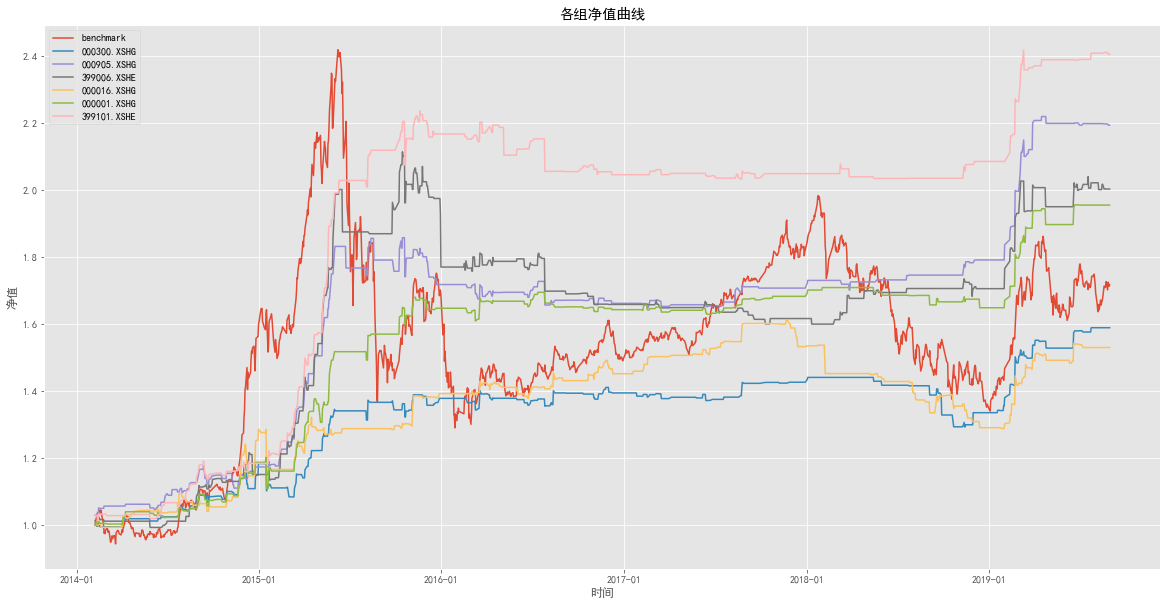

In [8]:
# 上涨=>查看按照研报信号各宽基指数风险指标
datas = [hs300_datas, zz500_datas, cyb_datas, sz50_datas,szzs_datas,zbzs_datas]
index_name = ['000300.XSHG', '000905.XSHG', '399006.XSHE', '000016.XSHG','000001.XSHG','399101.XSHE']
index_data_dic=dict(zip(index_name,datas))
# 储存回测风险指标
report_df = pd.DataFrame()
# 储存净值用于作图
net_dic={}

for index_data, n in zip(datas, index_name):
    factor_df = daily_factor(index_data, n)
    # 滞后一期的收益
    ret_arr = factor_df['close'].pct_change().shift(-1)
    ret_arr = np.nan_to_num(ret_arr.values)
    position = factor_df.r_up_singal.values * np.ones(len(factor_df))
    ret = position * ret_arr  # 收益率
    cum_ret = (1 + ret).cumprod()  # 净值
    # 最大回撤
    max_nv = np.maximum.accumulate(cum_ret)
    mdd = -np.min(cum_ret / max_nv - 1)
    # 胜率
    winning_ratio = np.sum(np.where(ret > 0, 1, 0)) / np.sum(position)
    # 计算年化收益率
    annual_ret = cum_ret[-1]**(240 / (len(ret) - 5)) - 1
    # 计算累计收益率
    cum_ret_rate = cum_ret[-1] - 1
    # 夏普
    sharpe = ret.mean() / ret.std() * np.sqrt(240)

    df = pd.DataFrame(
        {
            '年化收益率': '{:.2%}'.format(annual_ret),
            '累计收益率': '{:.2%}'.format(cum_ret_rate),
            '胜率': '{:.2%}'.format(winning_ratio),
            '开仓天数': np.sum(position),
            '最大回撤': '{:.2%}'.format(mdd),
            '夏普': '{:.2}'.format(sharpe)
        },
        index=[n])
    report_df = report_df.append(df)
    # 作图基准使用hs300
    if n=='000300.XSHG':
        net_dic['benchmark']=factor_df['close']/factor_df['close'][0]
    # 储存净值曲线
    net_dic[n]=cum_ret

# 查看风险指标
print('各指数风险指标:')

display(HTML(report_df.to_html()))

nev_df=pd.DataFrame(net_dic)
# 画图
plt.figure()
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 1, 1)

for i in nev_df.columns:
    ax1.plot(nev_df[i], label=i)

ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('时间')
plt.ylabel('净值')
plt.title('各组净值曲线')
plt.show()

## 在沪深300上对比各风险指标

**在沪深300上测试日度收益和月度收益计算信号指标的风险指标，比较分析风险指标情况：**

可以看日度收益率计算的信号出现后1至3日夏普及收益率较好，其中**持有3日年化收益率为17.41%，夏普为1.3**

In [9]:
# index_ret为22日收益率平均值度，csad为日收益率计算
df=daily_factor(hs300_datas, '000300.XSHG')
temp = []
params = 'ret'
holding = [1, 2, 3, 5, 10, 15, 20,22, 25, 30]
for j in holding:
    bt = back_test(df, 'r_up_singal', j)

    cum_ret = bt['cum_ret']
    ret = bt['ret']
    temp.append([
        '{:.2%}'.format(cum_ret[-1]**(240 / (len(cum_ret) - 5)) - 1),
        '{:.2}'.format(ret.mean() / ret.std() * np.sqrt(240))
    ])

temp = np.array(temp)
columns_name = list(map(lambda x: '持有{}天'.format(x), holding))
temp_df = pd.DataFrame(temp,columns=['ret','sharpe'],index=columns_name).T
print('日度收益率信号指标')
temp_df

日度收益率信号指标


,持有1天,持有2天,持有3天,持有5天,持有10天,持有15天,持有20天,持有22天,持有25天,持有30天
ret,8.54%,13.38%,17.41%,14.48%,10.62%,10.48%,6.94%,4.04%,3.72%,6.10%
sharpe,1.0,1.2,1.3,0.96,0.64,0.6,0.42,0.29,0.28,0.37


**月度**收益计算的信号再有持有期时均<font color=DarkMagenta>**不及**</font>**日度**收益率计算的信号

In [10]:
# index_ret为月收益率信号，csad为月收益率计算
factor_hs300=get_factor(hs300_datas, '000300.XSHG',22)
temp = []
params = 'ret'
holding = [1, 2, 3, 5, 10, 15, 20,22, 25, 30]
for j in holding:
    bt = back_test(factor_hs300, 'r_up_singal', j)

    cum_ret = bt['cum_ret']
    ret = bt['ret']
    temp.append([
        '{:.2%}'.format(cum_ret[-1]**(240 / (len(cum_ret) - 5)) - 1),
        '{:.2}'.format(ret.mean() / ret.std() * np.sqrt(240))
    ])

temp = np.array(temp)
columns_name = list(map(lambda x: '持有{}天'.format(x), holding))
temp_df = pd.DataFrame(temp,columns=['ret','sharpe'],index=columns_name).T
print('月度收益率信号指标')
temp_df

月度收益率信号指标


,持有1天,持有2天,持有3天,持有5天,持有10天,持有15天,持有20天,持有22天,持有25天,持有30天
ret,12.82%,13.23%,14.84%,9.66%,5.11%,7.05%,6.12%,7.38%,8.59%,7.95%
sharpe,0.83,0.83,0.89,0.59,0.34,0.42,0.38,0.43,0.47,0.44


**结论：**通过在沪深300上测试发现，在有持有期的情况下<font color=Darkred>日度收益率</font>计算的信号时**优于**<font color=Darkred>月度收益</font>计算的信号指标；在无持有期的情况下，月度指标要由于日度指标。

**日度**收益率计算指标在持有期为3日时的净值情况及风险指标

年化收益率: 17.41%
累计收益率: 147.83%
最大回撤: 10.96%
夏普比率：1.3


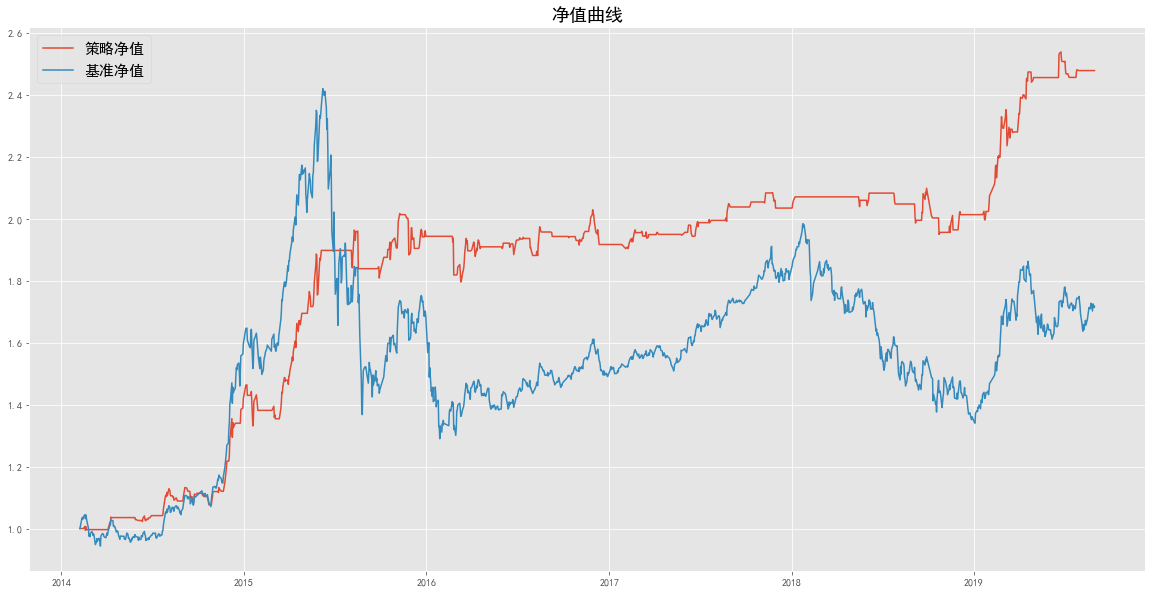

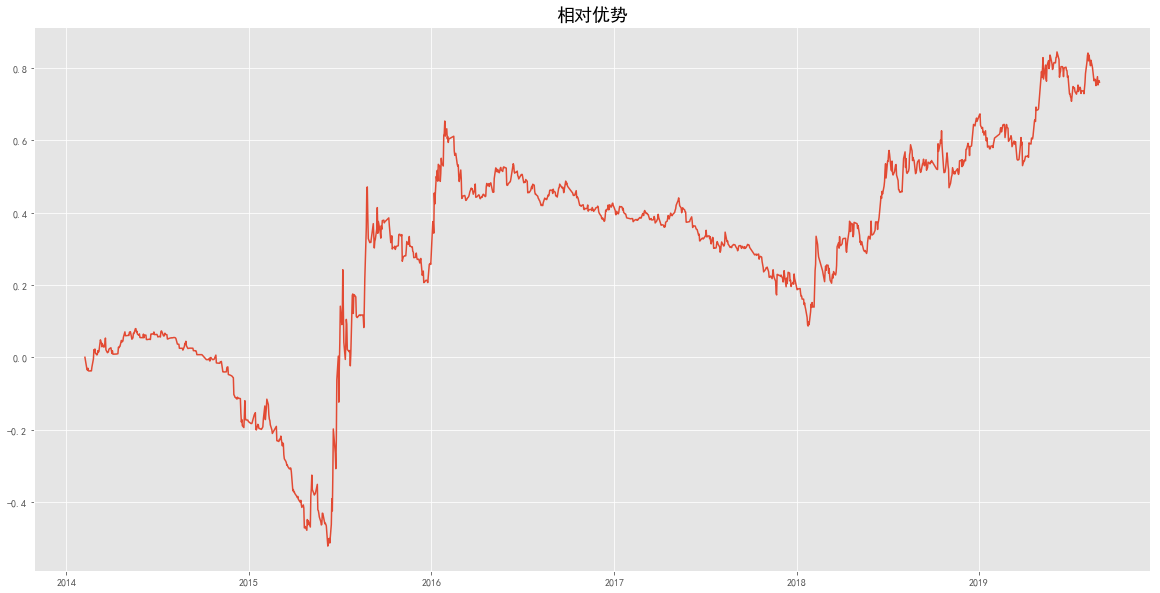

In [11]:
# up_singal效果比mean_singal好，holding=3时up_singal比较强
back_test(df,'r_up_singal',3)
summary(df)

## 构建SCORE对比分析

按**日度**益率计算**CSAD**,在根据22日的指数收益率平均值确认时上涨/下跌

我们根据<font color=CornFlowerBlue>**CSAD**</font>及<font color=CornFlowerBlue>**指数22日平均收益率收益率**</font>数值计算score，并将score从大到小分为五组进行回测；

**score的构建：**

```python

# 5-1 将CSAD和指数收益合成打分
def cal_score(csad, ret):
    if csad < 0 and ret > 0:
        score = csad + ret
    else:
        score=abs(csad)+abs(ret)
    return score
```

可以看到日度收益率在短期(3日)持有使由较好的收益，及较为稳定的夏普比率

In [12]:
# 日度收益率计算信号指标风险指标情况
df=daily_factor(index_data_dic['000300.XSHG'],'000300.XSHG')
# 夏普敏感性分析
sharpe_df = threshold_analysis(df,
                               threshold_col='r_factor',
                               holding=[3,5,10,15,20],
                               params='sharpe')
# 收益率敏感性分析
ret_df = threshold_analysis(df,
                            threshold_col='r_factor',
                            holding=[3,5,10,15,20],
                            params='ret')

print('夏普敏感性分析:')
display(HTML(sharpe_df.to_html()))
print('收率敏感性分析:')
display(HTML(ret_df.to_html()))

夏普敏感性分析:


,持有3天,持有5天,持有10天,持有15天,持有20天
273.2,0.557225,0.520973,0.520973,0.520973,0.520973
545.4,0.637869,0.505993,0.520973,0.520973,0.520973
817.6,0.594503,0.517535,0.486738,0.520577,0.520973
1089.8,0.965465,0.348784,0.323627,0.411863,0.480606


收率敏感性分析:


,持有3天,持有5天,持有10天,持有15天,持有20天
273.2,10.96%,10.04%,10.04%,10.04%,10.04%
545.4,12.77%,9.64%,10.04%,10.04%,10.04%
817.6,10.81%,9.67%,9.11%,10.02%,10.04%
1089.8,15.48%,4.95%,4.84%,7.09%,8.87%


按**月度**收益率计算**CSAD**,根据月度收益率确认上涨/下跌

由下表可以看出在持有期为15日时月度收益率信号较好

In [13]:
# 月度收益率计算信号指标风险指标情况
# 夏普敏感性分析
factor_hs300 = get_factor(hs300_datas, '000300.XSHG', 22)
sharpe_df = threshold_analysis(factor_hs300,
                               threshold_col='r_factor',
                               holding=[3,5,10,15,20],
                               params='sharpe')
# 收益率敏感性分析
ret_df = threshold_analysis(factor_hs300,
                            threshold_col='r_factor',
                            holding=[3,5,10,15,20],
                            params='ret')

print('夏普敏感性分析:')
display(HTML(sharpe_df.to_html()))
print('收率敏感性分析:')
display(HTML(ret_df.to_html()))

夏普敏感性分析:


,持有3天,持有5天,持有10天,持有15天,持有20天
277.6,0.518417,0.383144,0.472864,0.496967,0.489153
554.2,0.520350,0.255122,0.326271,0.411510,0.404458
830.8,0.873920,0.716314,0.911090,1.024472,0.918649
1107.4,0.012563,-0.022069,0.323722,0.418821,0.464447


收率敏感性分析:


,持有3天,持有5天,持有10天,持有15天,持有20天
277.6,9.46%,6.35%,8.67%,9.33%,9.14%
554.2,8.27%,3.15%,4.88%,6.99%,6.93%
830.8,10.49%,9.61%,14.28%,17.58%,16.22%
1107.4,-0.32%,-0.82%,3.31%,4.88%,5.86%


**结论：**通过在沪深300上的测试，可以发现在构建**SCORE**后**月度**收益率后续的可提升空间比**日度**收益率构建的SCORE提升空间更大,<u>***后续我们通过月度收益计算信号指标进行分析***</u>。

# 羊群效应策略表现

我们在六种宽基指数：上证综指、上证 50、沪深 300、中证 500、中小板综、创业板指，通过 CCK 模型判断指数成分股
间是否存在羊群效应，在羊群效应发生后买入/卖出。

策略步骤：计算向前 22 日（包括当日）每天的成分股组合截面绝对离 散度 CSAD，OLS 估计 CCK 模型中$R_{m,t}^2$的系数$R^2$，若$R^2$显著为负则认为当日该组合存在羊群效应，根据 22 日内指数平均收益率的正负区分羊群效应发生时的市场趋势为上涨/下跌，买入/卖出标的指数并持仓22 交易日，持有期不重复开仓。

**ps：**<font color=Darkred><u>过滤指数中上市不足三月\st\当日停牌股票</u></font>

**回测实际范围：**2014.1.1至2019.8.1

**回测方法：**当$R^2$的显著为负则认为当日该组合存在羊群效应，$R_m$为根据 22 日指数收益率的正负区分羊群效应发生时的市场趋势为上涨/下跌，既$R^2$为负，$R_m$大于零时，开仓；不满足此条件时平仓或不开仓。

市场趋势为上涨时策略在宽基指数上的平均表现如下所示：

可以看到羊群效应在创业版及中小企业板块中效果较好。

各指指数大体情况如下：

- <font color=CornFlowerBlue>**创业板指数**</font>年化收益为18%，夏普为0.9，胜率51.77%;
- <font color=CornFlowerBlue>**中小企业综指**</font>年化收益为17.58%，夏普为1，胜率55.98%;
- <font color=CornFlowerBlue>**中证500**</font>年化收益为15.49%，夏普为0.9，胜率56.08%;


- <font color=Darkred>**上证50**</font>回测效果***最差***，年化收益为11.5%，夏普为0.74，胜率51.29%;

各指数风险指标:


,年化收益率,累计收益率,胜率,开仓天数,最大回撤,夏普
000300.XSHG,12.82%,99.94%,54.21%,795.0,28.07%,0.83
000905.XSHG,15.49%,128.72%,56.08%,765.0,35.59%,0.9
399006.XSHE,18.00%,158.85%,51.77%,678.0,40.42%,0.9
000016.XSHG,11.50%,86.92%,51.29%,774.0,24.33%,0.74
000001.XSHG,12.41%,95.84%,56.41%,780.0,27.01%,0.83
399101.XSHE,17.58%,153.53%,55.98%,761.0,33.07%,1.0


<Figure size 432x288 with 0 Axes>

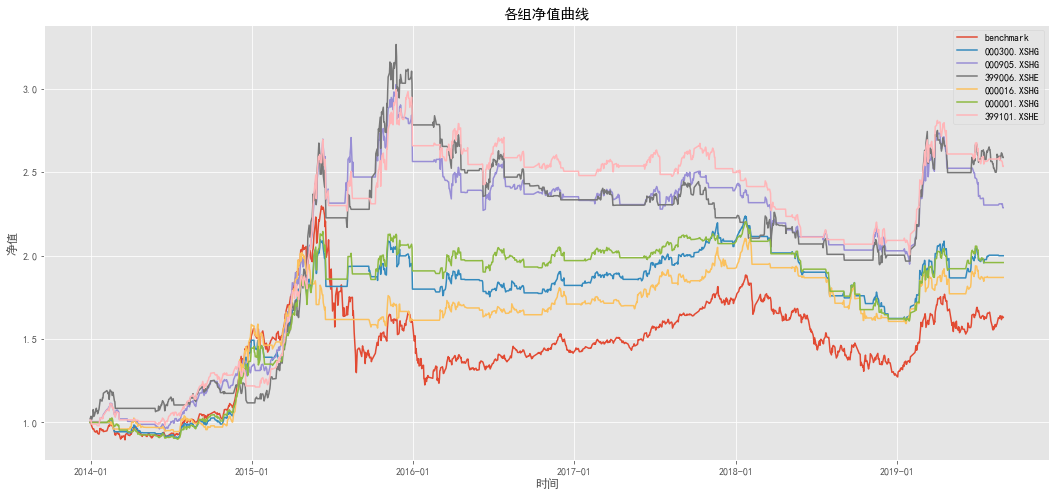

In [14]:
# 上涨=>查看按照研报信号各宽基指数风险指标
datas = [hs300_datas, zz500_datas, cyb_datas, sz50_datas,szzs_datas,zbzs_datas]
index_name = ['000300.XSHG', '000905.XSHG', '399006.XSHE', '000016.XSHG','000001.XSHG','399101.XSHE']
# 储存回测风险指标
report_df = pd.DataFrame()
# 储存净值用于作图
net_dic={}

for index_data, n in zip(datas, index_name):
    factor_df = get_factor(index_data, n, 22)
    # 滞后一期的收益
    ret_arr = factor_df['close'].pct_change().shift(-1)
    ret_arr = np.nan_to_num(ret_arr.values)
    position = factor_df.r_up_singal.values * np.ones(len(factor_df))
    ret = position * ret_arr  # 收益率
    cum_ret = (1 + ret).cumprod()  # 净值
    # 最大回撤
    max_nv = np.maximum.accumulate(cum_ret)
    mdd = -np.min(cum_ret / max_nv - 1)
    # 胜率
    winning_ratio = np.sum(np.where(ret > 0, 1, 0)) / np.sum(position)
    # 计算年化收益率
    annual_ret = cum_ret[-1]**(240 / (len(ret) - 5)) - 1
    # 计算累计收益率
    cum_ret_rate = cum_ret[-1] - 1
    # 夏普
    sharpe = ret.mean() / ret.std() * np.sqrt(240)

    df = pd.DataFrame(
        {
            '年化收益率': '{:.2%}'.format(annual_ret),
            '累计收益率': '{:.2%}'.format(cum_ret_rate),
            '胜率': '{:.2%}'.format(winning_ratio),
            '开仓天数': np.sum(position),
            '最大回撤': '{:.2%}'.format(mdd),
            '夏普': '{:.2}'.format(sharpe)
        },
        index=[n])
    report_df = report_df.append(df)
    # 作图基准使用hs300
    if n=='000300.XSHG':
        net_dic['benchmark']=factor_df['close']/factor_df['close'][0]
    # 储存净值曲线
    net_dic[n]=cum_ret

# 查看风险指标
print('各指数风险指标:')

display(HTML(report_df.to_html()))

nev_df=pd.DataFrame(net_dic)
# 画图
plt.figure()
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 1, 1)

for i in nev_df.columns:
    ax1.plot(nev_df[i], label=i)

ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('时间')
plt.ylabel('净值')
plt.title('各组净值曲线')
plt.show()

市场下跌阶段，创业板的效果依旧明显，具体情况如下表,

各指数风险指标:


,年化收益率,累计收益率,胜率,开仓天数,最大回撤,夏普
000300.XSHG,-3.49%,-18.44%,50.42%,589.0,41.87%,-0.11
000905.XSHG,-9.66%,-44.20%,52.02%,619.0,56.68%,-0.37
399006.XSHE,-12.08%,-52.29%,49.29%,706.0,62.81%,-0.42
000016.XSHG,-0.24%,-1.38%,50.90%,609.0,38.00%,0.075
000001.XSHG,-6.10%,-30.35%,51.32%,604.0,44.84%,-0.29
399101.XSHE,-9.36%,-43.15%,50.72%,623.0,53.43%,-0.38


<Figure size 432x288 with 0 Axes>

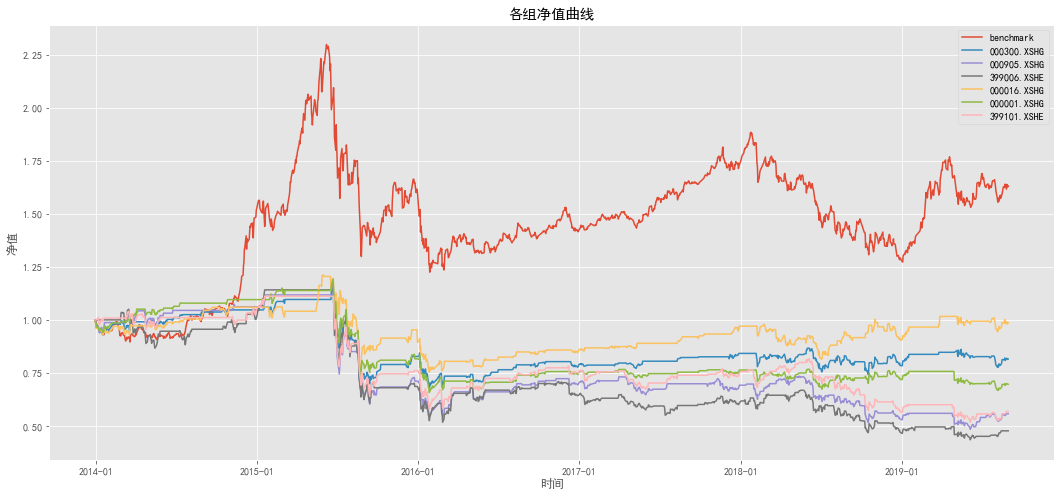

In [15]:
# 下跌=>查看按照研报信号各宽基指数风险指标
datas = [hs300_datas, zz500_datas, cyb_datas, sz50_datas,szzs_datas,zbzs_datas]
index_name = ['000300.XSHG', '000905.XSHG', '399006.XSHE', '000016.XSHG','000001.XSHG','399101.XSHE']
# 储存回测风险指标
report_df = pd.DataFrame()
# 储存净值用于作图
net_dic={}
for index_data, n in zip(datas, index_name):
    factor_df = get_factor(index_data, n, 22)
    # 滞后一期的收益
    ret_arr = factor_df['close'].pct_change().shift(-1)
    ret_arr = np.nan_to_num(ret_arr.values)
    position = factor_df.r_down_singal.values * np.ones(len(factor_df))
    ret = position * ret_arr  # 收益率
    cum_ret = (1 + ret).cumprod()  # 净值
    # 最大回撤
    max_nv = np.maximum.accumulate(cum_ret)
    mdd = -np.min(cum_ret / max_nv - 1)
    # 胜率
    winning_ratio = np.sum(np.where(ret > 0, 1, 0)) / np.sum(position)
    # 计算年化收益率
    annual_ret = cum_ret[-1]**(240 / (len(ret) - 5)) - 1
    # 计算累计收益率
    cum_ret_rate = cum_ret[-1] - 1
    # 夏普
    sharpe = ret.mean() / ret.std() * np.sqrt(240)

    df = pd.DataFrame(
        {
            '年化收益率': '{:.2%}'.format(annual_ret),
            '累计收益率': '{:.2%}'.format(cum_ret_rate),
            '胜率': '{:.2%}'.format(winning_ratio),
            '开仓天数': np.sum(position),
            '最大回撤': '{:.2%}'.format(mdd),
            '夏普': '{:.2}'.format(sharpe)
        },
        index=[n])
    report_df = report_df.append(df)
    # 作图基准使用hs300
    if n=='000300.XSHG':
        net_dic['benchmark']=factor_df['close']/factor_df['close'][0]
    # 储存净值曲线
    net_dic[n]=cum_ret

# 查看风险指标
print('各指数风险指标:')

from IPython.core.display import HTML
display(HTML(report_df.to_html()))

nev_df=pd.DataFrame(net_dic)
# 画图
plt.figure()
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 1, 1)

for i in nev_df.columns:
    ax1.plot(nev_df[i], label=i)

ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('时间')
plt.ylabel('净值')
plt.title('各组净值曲线')
plt.show()

# 羊群效应在各指数上的表现

我们根据CSAD及指数收益率数值计算score，并将score从大到小分为五组进行回测；

**score的构建：**

```python

# 5-1 将CSAD和指数收益合成打分
def cal_score(csad, ret):
    if csad < 0 and ret > 0:
        score = csad + ret
    else:
        score=abs(csad)+abs(ret)
    return score
```

### 沪深300上的择时效果

In [16]:
# 获取因子
factor_hs300 = get_factor(hs300_datas, '000300.XSHG', 22)
# 分组
group_hs = get_group(factor_hs300, 5, 'r_factor')

group_hs['未来5日涨幅'] = group_hs.close.pct_change(4).shift(-4)
group_hs['未来15日涨幅'] = group_hs.close.pct_change(14).shift(-14)
group_hs['未来20日涨幅'] = group_hs.close.pct_change(19).shift(-19)

由下图可以看到第4组在当日、未来5日、未来15日、未来20日的收益都较为稳定

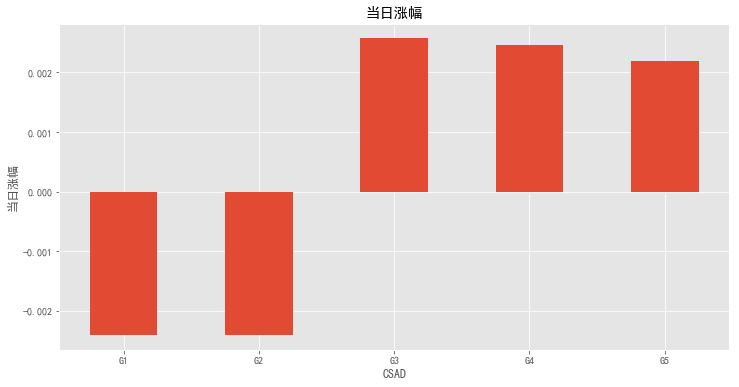

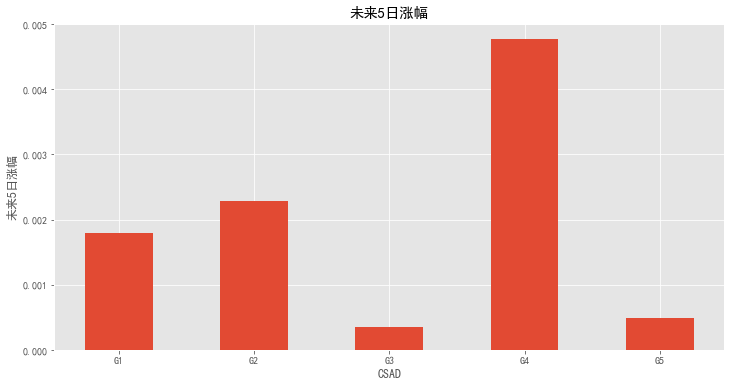

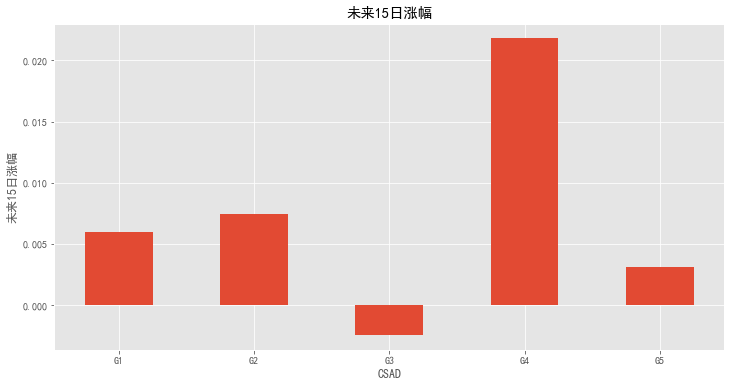

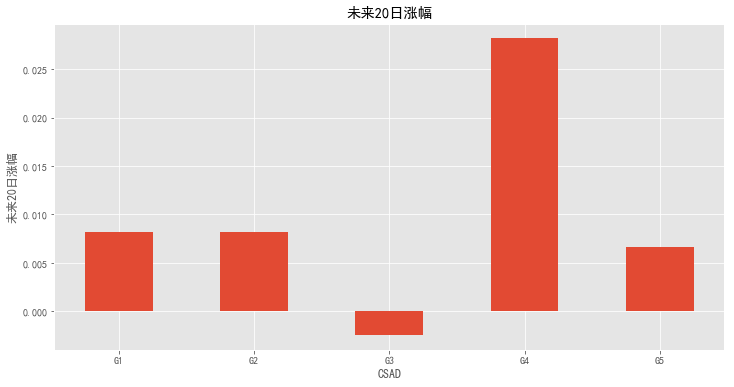

In [17]:
# 查看因子与未来收益率的关系
def group_plot(df, y):
    a = df[df['GROUP'] != 0]
    b = a.groupby('GROUP').mean()
    plt.xlabel('CSAD')
    plt.ylabel(y)
    plt.bar(np.array(b.index), b[y], width=0.5)


plt.figure(1, figsize=(12, 6))
plt.title('当日涨幅')
group_plot(group_hs, '当日涨幅')
plt.figure(2, figsize=(12, 6))
plt.title('未来5日涨幅')
group_plot(group_hs, '未来5日涨幅')
plt.figure(3, figsize=(12, 6))
plt.title('未来15日涨幅')
group_plot(group_hs, '未来15日涨幅')
plt.figure(4, figsize=(12, 6))
plt.title('未来20日涨幅')
group_plot(group_hs, '未来20日涨幅')

### 沪深300上的分组回测

根据沪深300的score进行分组回测，持有天数为22日

<Figure size 432x288 with 0 Axes>

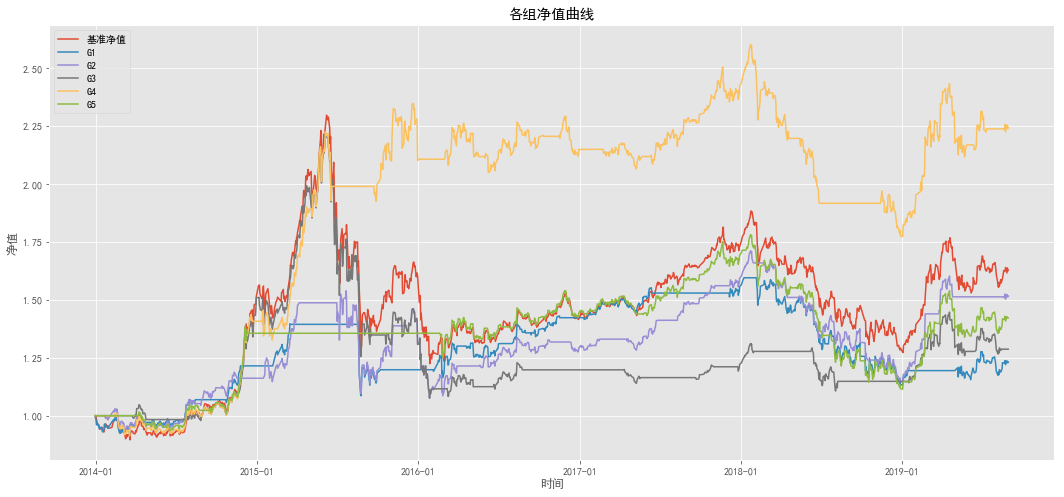

In [18]:
# 获取分组回测数据
cum_ret_dic, report = group_back_test(group_hs, 'GROUP', 22)
# 构建df
cum_df = pd.DataFrame(cum_ret_dic, index=factor_hs300.index[:-1])
# 获取分组名称
group_list = cum_df.columns
# 画图
plt.figure()
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 1, 1)

for i in group_list:
    ax1.plot(cum_df[i], label=i)

ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('时间')
plt.ylabel('净值')
plt.title('各组净值曲线')
plt.show()

<Figure size 432x288 with 0 Axes>

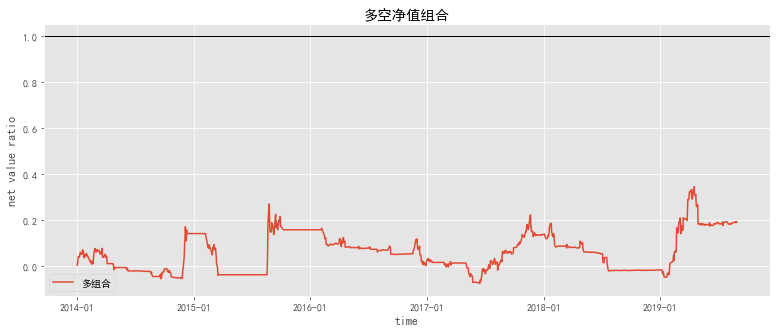

In [19]:
# 多空收益
d = cum_df['G5'] - cum_df['G1']
plt.figure()
fig = plt.figure(figsize=(13, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(d, label='多组合')
ax1.axhline(1.0, linestyle='-', color='black', lw=1)
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('net value ratio')
plt.title('多空净值组合')
plt.show()

第四组年化收益率为15.13%，夏普为0.91较为稳定

In [20]:
# 回测报告
pd.DataFrame(report).T

,夏普比率,年化收益率,日胜率,最大回撤,满仓天数,空仓天数,累计收益率
G1,0.32,3.69%,50.77%,29.03%,776,608,23.15%
G2,0.48,7.52%,52.75%,33.14%,910,474,51.66%
G3,0.32,4.49%,54.22%,51.56%,699,685,28.72%
G4,0.91,15.13%,53.45%,31.86%,999,385,124.54%
G5,0.49,6.33%,51.24%,37.43%,927,457,42.23%


### 沪深300敏感性分析

通过敏感性分析我们可以看到在持有天数为**15**天时,夏普为<font color=Darkred>**1.02**</font>年化收益率为<font color=Darkred>**17.58%**</font>达到最优

In [21]:
# 夏普敏感性分析
sharpe_df = threshold_analysis(factor_hs300,
                               threshold_col='r_factor',
                               params='sharpe')
# 收益率敏感性分析
ret_df = threshold_analysis(factor_hs300,
                            threshold_col='r_factor',
                            params='ret')

print('夏普敏感性分析:')
display(HTML(sharpe_df.to_html()))
print('收率敏感性分析:')
display(HTML(ret_df.to_html()))

夏普敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,0.383144,0.472864,0.496967,0.489153,0.484300
554.2,0.255122,0.326271,0.411510,0.404458,0.424605
830.8,0.716314,0.911090,1.024472,0.918649,0.761617
1107.4,-0.022069,0.323722,0.418821,0.464447,0.589634


收率敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,6.35%,8.67%,9.33%,9.14%,9.03%
554.2,3.15%,4.88%,6.99%,6.93%,7.48%
830.8,9.61%,14.28%,17.58%,16.22%,14.00%
1107.4,-0.82%,3.31%,4.88%,5.86%,8.05%


### 中证500上的择时效果

In [22]:
# 获取因子
factor_zz500 = get_factor(zz500_datas, '000905.XSHG', 22)
# 分组
group_zz = get_group(factor_zz500, 5, 'r_factor')

group_zz['未来5日涨幅'] = group_zz.close.pct_change(4).shift(-4)
group_zz['未来15日涨幅'] = group_zz.close.pct_change(14).shift(-14)
group_zz['未来20日涨幅'] = group_zz.close.pct_change(19).shift(-19)

与沪深300的情况不同在持有当日与未来5日的各组收益不稳定；G5在未来15、20日收益较高

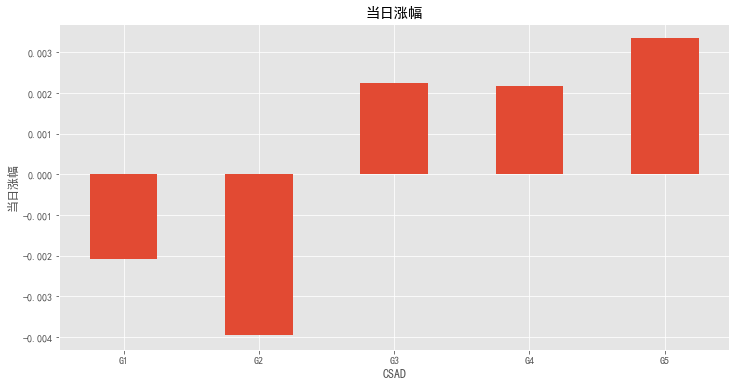

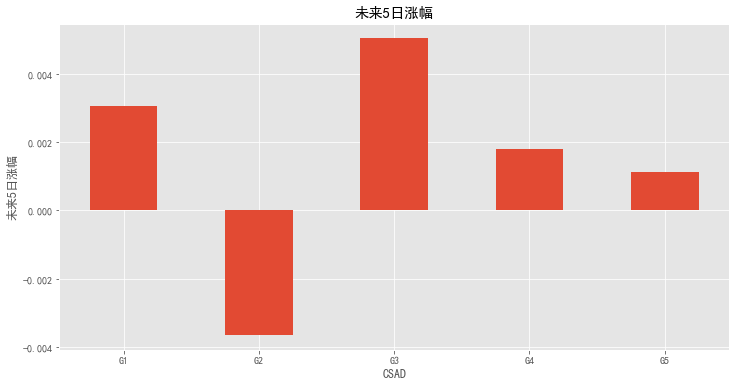

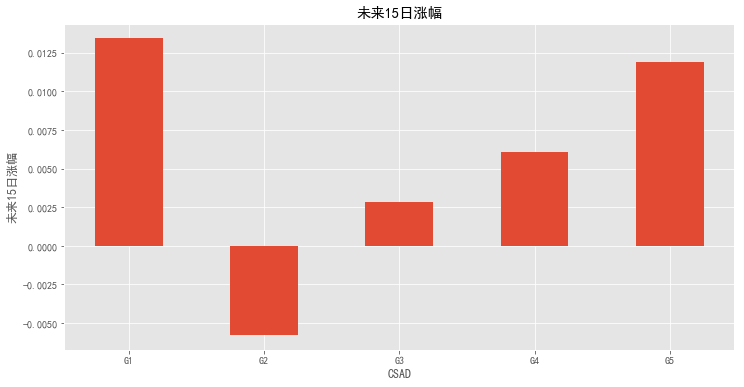

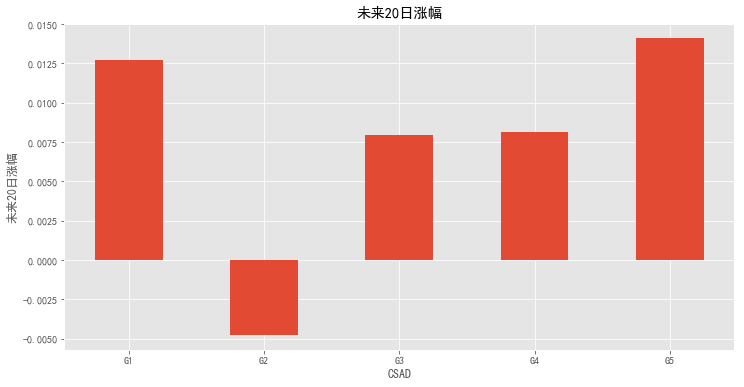

In [23]:
# 绘图
plt.figure(1, figsize=(12, 6))
plt.title('当日涨幅')
group_plot(group_zz, '当日涨幅')
plt.figure(2, figsize=(12, 6))
plt.title('未来5日涨幅')
group_plot(group_zz, '未来5日涨幅')
plt.figure(3, figsize=(12, 6))
plt.title('未来15日涨幅')
group_plot(group_zz, '未来15日涨幅')
plt.figure(4, figsize=(12, 6))
plt.title('未来20日涨幅')
group_plot(group_zz, '未来20日涨幅')

### 中证500上的分组回测

根据中证500的score进行分组回测，持有天数为20日

<Figure size 432x288 with 0 Axes>

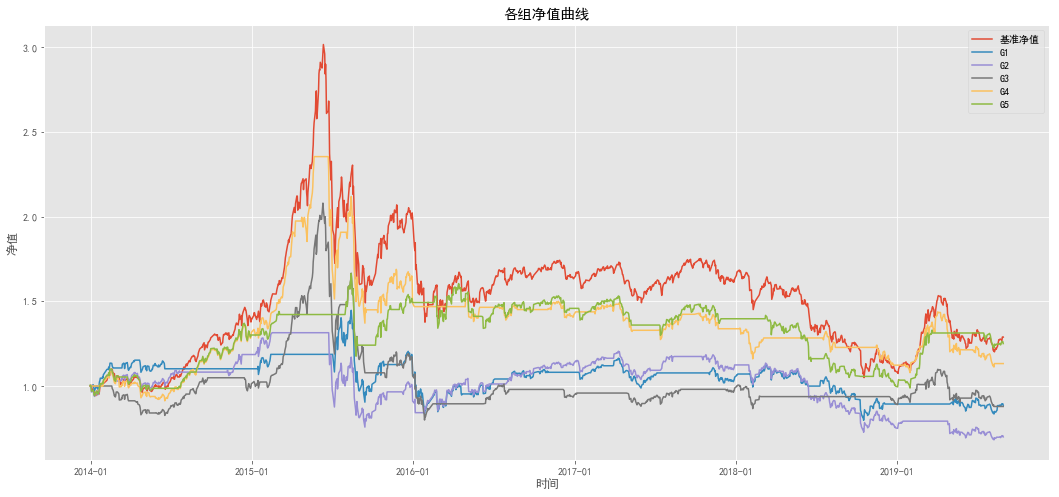

In [24]:
# 获取分组回测数据
cum_ret_dic, report = group_back_test(group_zz, 'GROUP', 20)
# 构建df
cum_df = pd.DataFrame(cum_ret_dic, index=factor_zz500.index[:-1])
# 获取分组名称
group_list = cum_df.columns
# 画图
plt.figure()
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 1, 1)

for i in group_list:
    ax1.plot(cum_df[i], label=i)

ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('时间')
plt.ylabel('净值')
plt.title('各组净值曲线')
plt.show()

<Figure size 432x288 with 0 Axes>

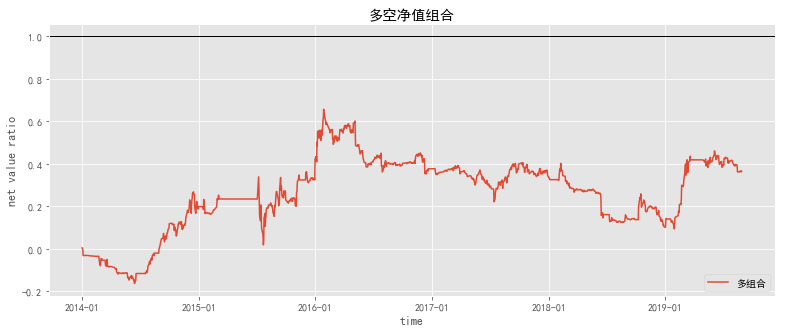

In [25]:
# 多空收益净值
d = cum_df['G5'] - cum_df['G1']
plt.figure()
fig = plt.figure(figsize=(13, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(d, label='多组合')
ax1.axhline(1.0, linestyle='-', color='black', lw=1)
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('net value ratio')
plt.title('多空净值组合')
plt.show()

从上面的净值曲线及下表的风险指标中可以看到羊群效应在中证500上的择时效果并不理想。各组单调性及稳定性也不理想。

In [26]:
# 回测报告
pd.DataFrame(report).T

,夏普比率,年化收益率,日胜率,最大回撤,满仓天数,空仓天数,累计收益率
G1,0.014,-2.08%,52.85%,44.87%,772,612,-11.35%
G2,-0.14,-6.03%,52.05%,48.09%,953,431,-30.03%
G3,0.011,-2.22%,55.87%,61.56%,682,702,-12.08%
G4,0.21,2.19%,55.56%,54.17%,837,547,13.24%
G5,0.3,3.97%,53.07%,40.60%,863,521,25.04%


### 中证500敏感性分析

通过敏感性分析我们可以看到在持有天数为**10**天时,夏普为<font color=Darkred>**0.83**</font>年化收益率为<font color=Darkred>**11.93%**</font>达到最优,但总体效果并不好

In [27]:
# 夏普敏感性分析
sharpe_df = threshold_analysis(factor_zz500,
                               threshold_col='r_factor',
                               params='sharpe')
# 收益率敏感性分析
ret_df = threshold_analysis(factor_zz500,
                            threshold_col='r_factor',
                            params='ret')

print('夏普敏感性分析:')
display(HTML(sharpe_df.to_html()))
print('收率敏感性分析:')
display(HTML(ret_df.to_html()))

夏普敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,0.201438,0.291525,0.235250,0.278231,0.292724
554.2,0.294454,0.134756,0.279986,0.310918,0.248219
830.8,-0.012515,-0.011819,0.204884,0.305247,0.172280
1107.4,0.459823,0.831499,0.398340,0.301817,0.237495


收率敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,1.81%,4.29%,2.69%,3.92%,4.34%
554.2,4.15%,0.28%,3.93%,4.81%,3.06%
830.8,-2.05%,-2.55%,2.08%,4.55%,1.07%
1107.4,5.34%,11.93%,5.50%,3.97%,2.79%


### 上证50上的择时效果

In [28]:
# 获取因子
factor_sz50 = get_factor(zz500_datas, '000016.XSHG', 22)
# 分组
group_sz = get_group(factor_sz50, 5, 'r_factor')

group_sz['未来5日涨幅'] = group_sz.close.pct_change(4).shift(-4)
group_sz['未来15日涨幅'] = group_sz.close.pct_change(14).shift(-14)
group_sz['未来20日涨幅'] = group_sz.close.pct_change(19).shift(-19)

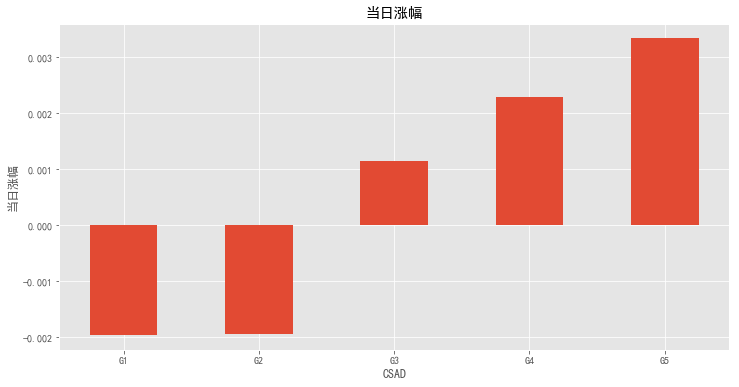

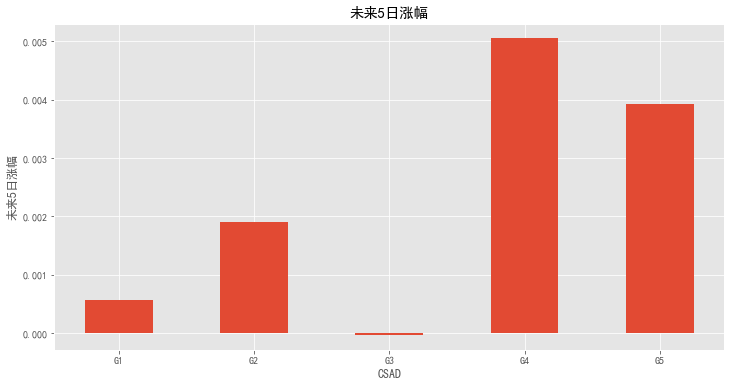

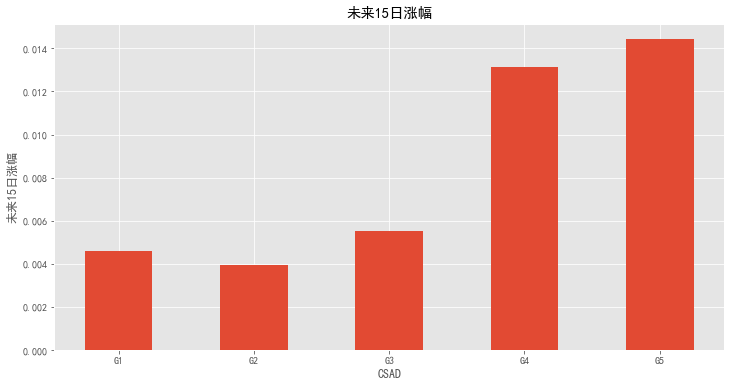

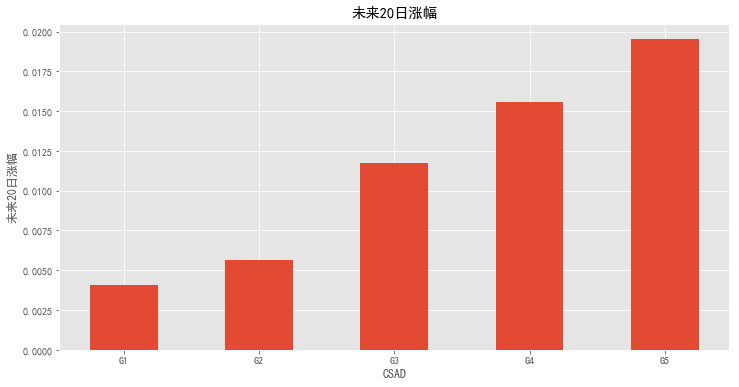

In [29]:
# 绘图
plt.figure(1, figsize=(12, 6))
plt.title('当日涨幅')
group_plot(group_sz, '当日涨幅')
plt.figure(2, figsize=(12, 6))
plt.title('未来5日涨幅')
group_plot(group_sz, '未来5日涨幅')
plt.figure(3, figsize=(12, 6))
plt.title('未来15日涨幅')
group_plot(group_sz, '未来15日涨幅')
plt.figure(4, figsize=(12, 6))
plt.title('未来20日涨幅')
group_plot(group_sz, '未来20日涨幅')

### 上证50上的分组回测

<Figure size 432x288 with 0 Axes>

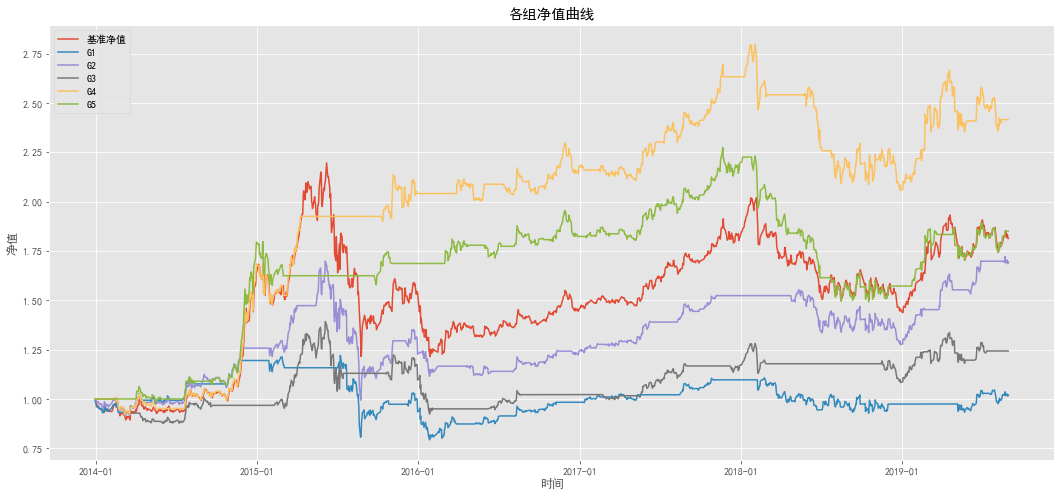

In [30]:
# 获取分组回测数据
cum_ret_dic, report = group_back_test(group_sz, 'GROUP', 20)
# 构建df
cum_df = pd.DataFrame(cum_ret_dic, index=factor_zz500.index[:-1])
# 获取分组名称
group_list = cum_df.columns
# 画图
plt.figure()
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 1, 1)

for i in group_list:
    ax1.plot(cum_df[i], label=i)

ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('时间')
plt.ylabel('净值')
plt.title('各组净值曲线')
plt.show()

<Figure size 432x288 with 0 Axes>

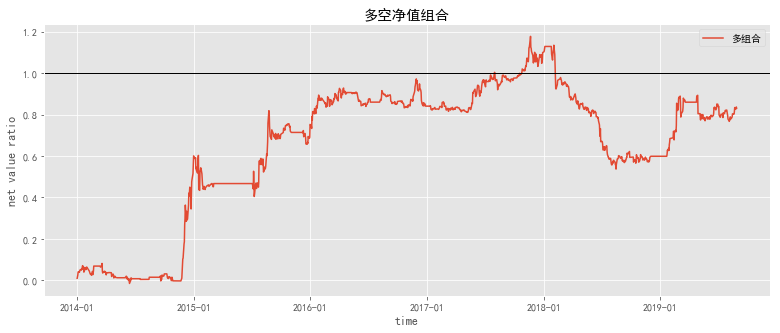

In [31]:
# 多空收益净值
d = cum_df['G5'] - cum_df['G1']
plt.figure()
fig = plt.figure(figsize=(13, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(d, label='多组合')
ax1.axhline(1.0, linestyle='-', color='black', lw=1)
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('net value ratio')
plt.title('多空净值组合')
plt.show()

与在沪深300中的情况相同**第四组**年化收益及夏普较好

In [32]:
# 回测报告
pd.DataFrame(report).T

,夏普比率,年化收益率,日胜率,最大回撤,满仓天数,空仓天数,累计收益率
G1,0.11,0.35%,50.26%,35.05%,764,620,2.03%
G2,0.57,9.63%,50.51%,41.51%,891,493,69.52%
G3,0.31,3.86%,53.63%,33.67%,647,737,24.32%
G4,0.98,16.61%,51.03%,26.46%,925,459,141.61%
G5,0.75,11.32%,51.60%,34.39%,843,541,85.07%


### 上证50敏感性分析

通过敏感性分析我们可以看到在持有天数为**25**天时,夏普为<font color=Darkred>**1.02**</font>年化收益率为<font color=Darkred>**19.32%**</font>达到最优

In [33]:
# 夏普敏感性分析
sharpe_df = threshold_analysis(factor_sz50,
                               threshold_col='r_factor',
                               params='sharpe')
# 收益率敏感性分析
ret_df = threshold_analysis(factor_sz50,
                            threshold_col='r_factor',
                            params='ret')

print('夏普敏感性分析:')
display(HTML(sharpe_df.to_html()))
print('收率敏感性分析:')
display(HTML(ret_df.to_html()))

夏普敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,0.660304,0.511365,0.525894,0.533767,0.568654
554.2,0.715452,0.633551,0.679475,0.676850,0.708128
830.8,0.911218,0.762223,0.881747,0.962861,1.027565
1107.4,0.585904,0.738515,0.734261,0.745644,0.960380


收率敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,13.04%,9.71%,10.19%,10.43%,11.38%
554.2,12.72%,11.44%,13.07%,13.22%,14.11%
830.8,14.12%,12.12%,14.90%,17.16%,19.32%
1107.4,7.41%,10.42%,10.68%,11.31%,15.85%


### 上证综指上的择时效果

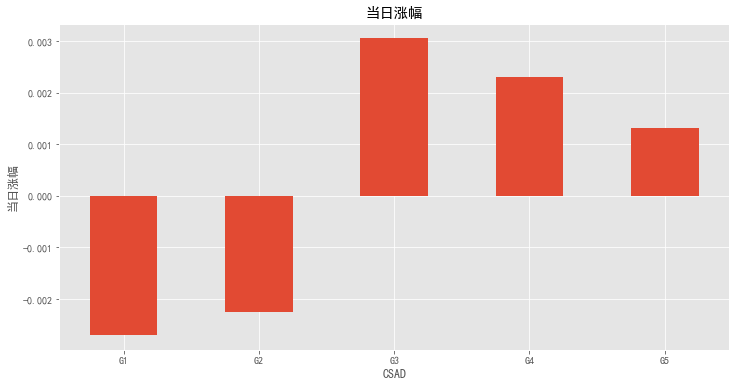

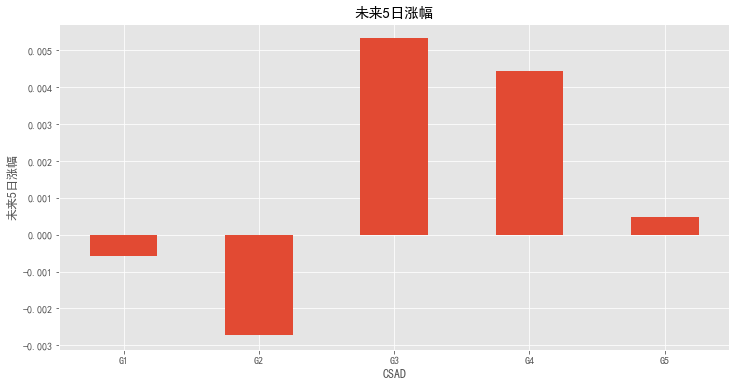

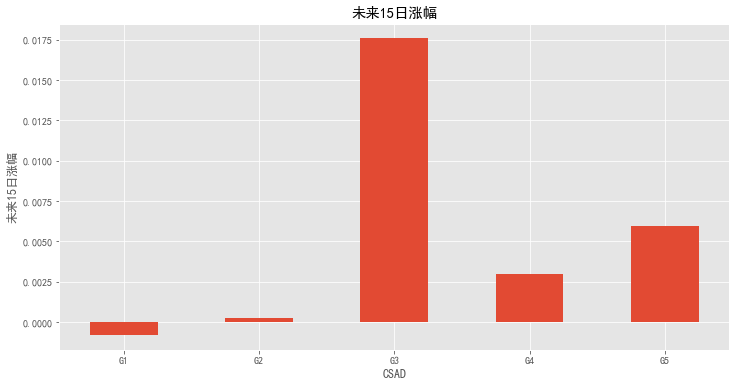

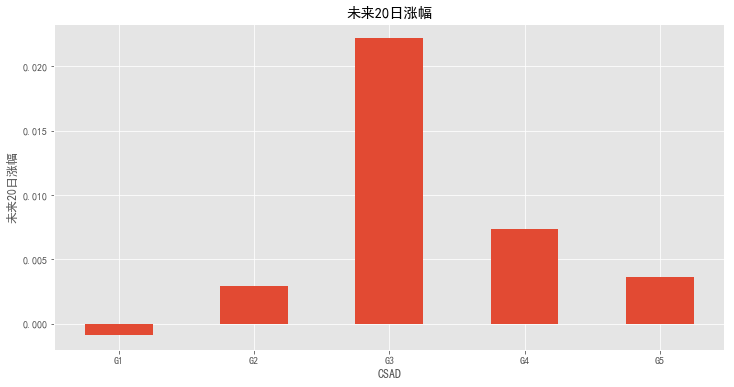

In [34]:
# 获取因子
factor_szzs = get_factor(szzs_datas, '000001.XSHG', 22)
# 分组
group_szzs = get_group(factor_szzs, 5, 'r_factor')

group_szzs['未来5日涨幅'] = group_szzs.close.pct_change(4).shift(-4)
group_szzs['未来15日涨幅'] = group_szzs.close.pct_change(14).shift(-14)
group_szzs['未来20日涨幅'] = group_szzs.close.pct_change(19).shift(-19)

# 绘图
plt.figure(1, figsize=(12, 6))
plt.title('当日涨幅')
group_plot(group_szzs, '当日涨幅')
plt.figure(2, figsize=(12, 6))
plt.title('未来5日涨幅')
group_plot(group_szzs, '未来5日涨幅')
plt.figure(3, figsize=(12, 6))
plt.title('未来15日涨幅')
group_plot(group_szzs, '未来15日涨幅')
plt.figure(4, figsize=(12, 6))
plt.title('未来20日涨幅')
group_plot(group_szzs, '未来20日涨幅')

### 上证综指上的分组回测

<Figure size 432x288 with 0 Axes>

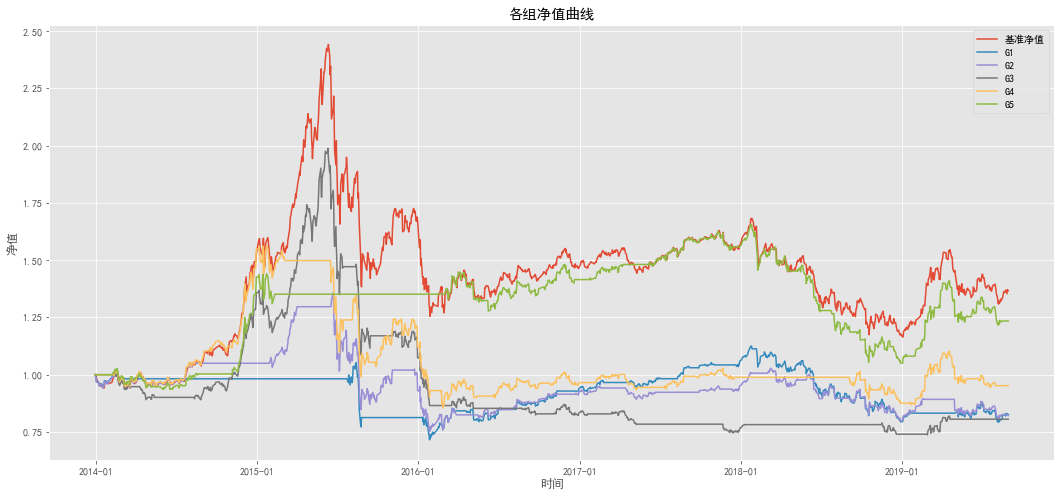

In [35]:
# 获取分组回测数据
cum_ret_dic, report = group_back_test(group_szzs, 'GROUP', 20)
# 构建df
cum_df = pd.DataFrame(cum_ret_dic, index=factor_szzs.index[:-1])
# 获取分组名称
group_list = cum_df.columns
# 画图
plt.figure()
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 1, 1)

for i in group_list:
    ax1.plot(cum_df[i], label=i)

ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('时间')
plt.ylabel('净值')
plt.title('各组净值曲线')
plt.show()

<Figure size 432x288 with 0 Axes>

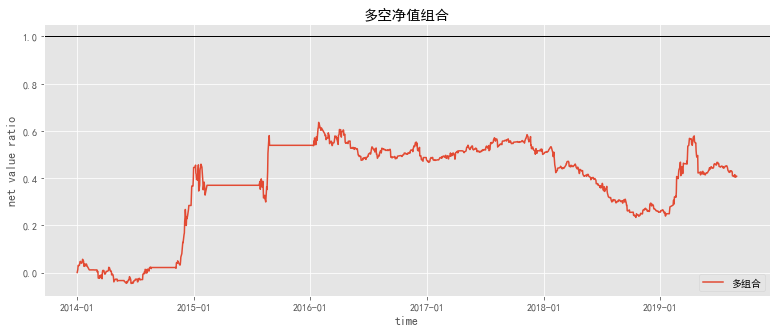

In [36]:
# 多空收益净值
d = cum_df['G5'] - cum_df['G1']
plt.figure()
fig = plt.figure(figsize=(13, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(d, label='多组合')
ax1.axhline(1.0, linestyle='-', color='black', lw=1)
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('net value ratio')
plt.title('多空净值组合')
plt.show()

情况与中证500上的效果相近，效果不理想

In [37]:
# 回测报告
pd.DataFrame(report).T

,夏普比率,年化收益率,日胜率,最大回撤,满仓天数,空仓天数,累计收益率
G1,-0.17,-3.27%,52.26%,32.03%,685,699,-17.38%
G2,-0.094,-3.37%,53.29%,44.78%,820,564,-17.85%
G3,-0.12,-3.69%,54.65%,62.93%,591,793,-19.43%
G4,0.053,-0.85%,54.78%,45.35%,889,495,-4.80%
G5,0.33,3.73%,54.02%,36.57%,870,514,23.42%


### 上证综指敏感性分析

通过敏感性分析我们可以看到在持有天数为**5**天时,夏普为<font color=Darkred>**0.42**</font>年化收益率为<font color=Darkred>**6.18%**</font>达到最优

In [38]:
# 夏普敏感性分析
sharpe_df = threshold_analysis(factor_szzs,
                               threshold_col='r_factor',
                               params='sharpe')
# 收益率敏感性分析
ret_df = threshold_analysis(factor_szzs,
                            threshold_col='r_factor',
                            params='ret')

print('夏普敏感性分析:')
display(HTML(sharpe_df.to_html()))
print('收率敏感性分析:')
display(HTML(ret_df.to_html()))

夏普敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,0.326645,0.334628,0.316967,0.345330,0.350177
554.2,0.420137,0.341633,0.301278,0.281204,0.345446
830.8,-0.006813,-0.232146,-0.189633,-0.085984,0.067842
1107.4,0.596326,0.456162,0.232410,0.330138,0.384381


收率敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,4.88%,5.11%,4.71%,5.40%,5.52%
554.2,6.18%,4.97%,4.21%,3.81%,5.32%
830.8,-1.27%,-5.81%,-5.50%,-3.79%,-0.79%
1107.4,5.77%,4.83%,2.24%,3.73%,4.68%


### 创业板综合指数上的择时效果

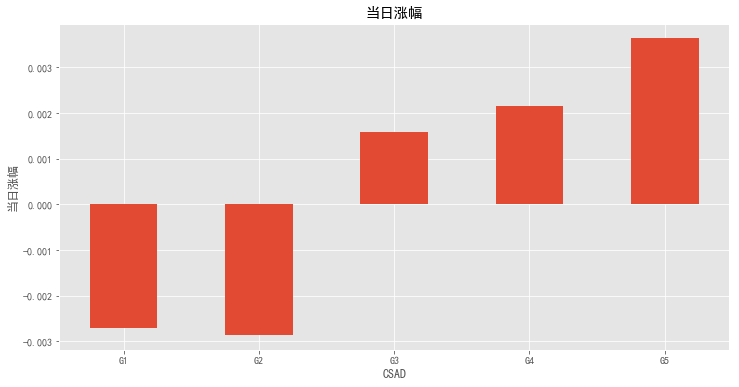

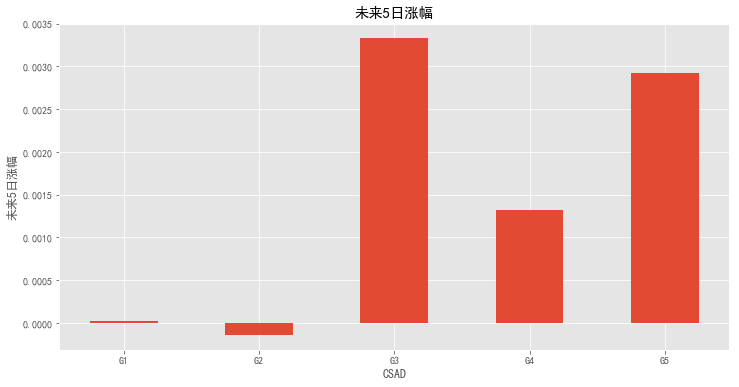

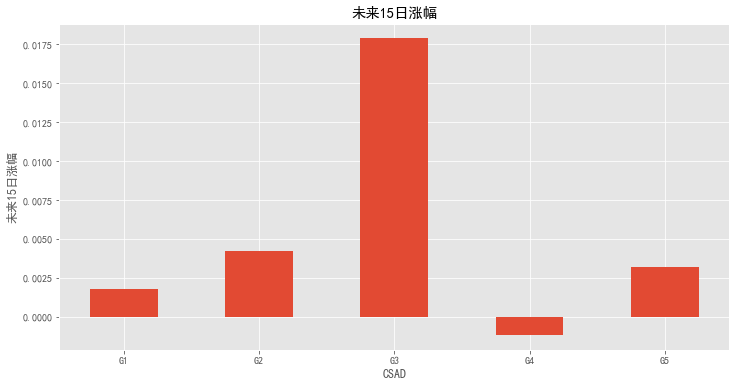

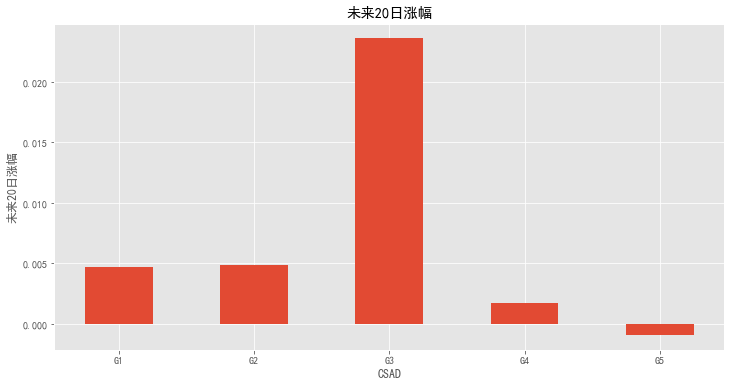

In [39]:
# 获取因子
factor_cyb = get_factor(cyb_datas, '399006.XSHE', 22)
# 分组
group_cyb = get_group(factor_cyb, 5, 'r_factor')

group_cyb['未来5日涨幅'] = group_cyb.close.pct_change(4).shift(-4)
group_cyb['未来15日涨幅'] = group_cyb.close.pct_change(14).shift(-14)
group_cyb['未来20日涨幅'] = group_cyb.close.pct_change(19).shift(-19)

# 绘图
plt.figure(1, figsize=(12, 6))
plt.title('当日涨幅')
group_plot(group_cyb, '当日涨幅')
plt.figure(2, figsize=(12, 6))
plt.title('未来5日涨幅')
group_plot(group_cyb, '未来5日涨幅')
plt.figure(3, figsize=(12, 6))
plt.title('未来15日涨幅')
group_plot(group_cyb, '未来15日涨幅')
plt.figure(4, figsize=(12, 6))
plt.title('未来20日涨幅')
group_plot(group_cyb, '未来20日涨幅')

### 创业板综合指数上的分组回测

<Figure size 432x288 with 0 Axes>

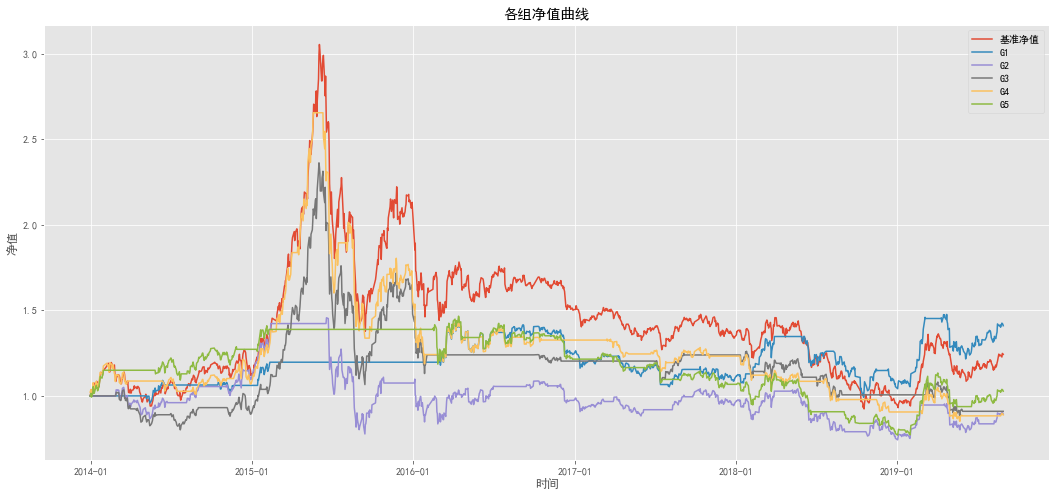

In [40]:
# 获取分组回测数据
cum_ret_dic, report = group_back_test(group_cyb, 'GROUP', 20)
# 构建df
cum_df = pd.DataFrame(cum_ret_dic, index=factor_cyb.index[:-1])
# 获取分组名称
group_list = cum_df.columns
# 画图
plt.figure()
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 1, 1)

for i in group_list:
    ax1.plot(cum_df[i], label=i)

ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('时间')
plt.ylabel('净值')
plt.title('各组净值曲线')
plt.show()

<Figure size 432x288 with 0 Axes>

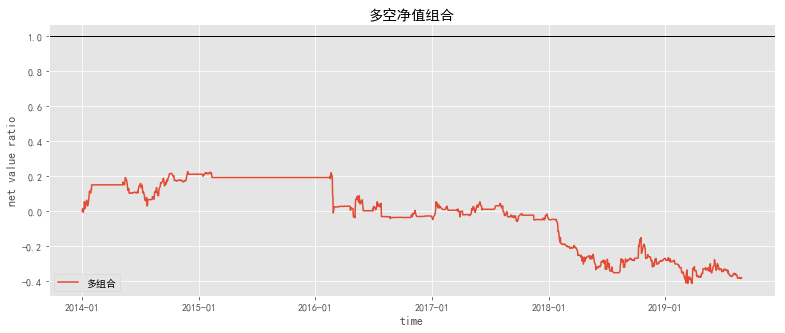

In [41]:
# 多空收益净值
d = cum_df['G5'] - cum_df['G1']
plt.figure()
fig = plt.figure(figsize=(13, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(d, label='多组合')
ax1.axhline(1.0, linestyle='-', color='black', lw=1)
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('net value ratio')
plt.title('多空净值组合')
plt.show()

In [42]:
# 回测报告
pd.DataFrame(report).T

,夏普比率,年化收益率,日胜率,最大回撤,满仓天数,空仓天数,累计收益率
G1,0.42,6.17%,49.66%,30.99%,745,639,41.00%
G2,0.057,-1.93%,49.38%,48.97%,887,497,-10.59%
G3,0.071,-1.63%,50.83%,62.54%,663,721,-9.00%
G4,0.056,-2.03%,49.81%,67.92%,805,579,-11.10%
G5,0.12,0.47%,49.36%,47.41%,778,606,2.73%


### 创业板综合指数敏感性分析

通过敏感性分析我们可以看到在持有天数为**15**天时,夏普为<font color=Darkred>**0.31**</font>年化收益率为<font color=Darkred>**4.92%**</font>达到最优

In [43]:
# 夏普敏感性分析
sharpe_df = threshold_analysis(factor_cyb,
                               threshold_col='r_factor',
                               params='sharpe')
# 收益率敏感性分析
ret_df = threshold_analysis(factor_cyb,
                            threshold_col='r_factor',
                            params='ret')

print('夏普敏感性分析:')
display(HTML(sharpe_df.to_html()))
print('收率敏感性分析:')
display(HTML(ret_df.to_html()))

夏普敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,0.252302,0.302834,0.310161,0.296136,0.248519
554.2,0.119716,0.299526,0.238660,0.238902,0.211113
830.8,-0.015989,-0.057498,0.051276,0.118246,0.180309
1107.4,0.137731,0.230182,0.284131,0.119185,0.216516


收率敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,3.06%,4.68%,4.92%,4.45%,2.88%
554.2,-0.67%,4.58%,2.66%,2.62%,1.71%
830.8,-2.70%,-4.55%,-2.26%,-0.78%,0.90%
1107.4,0.95%,2.46%,3.52%,0.47%,2.35%


### 中小板指数上的择时效果

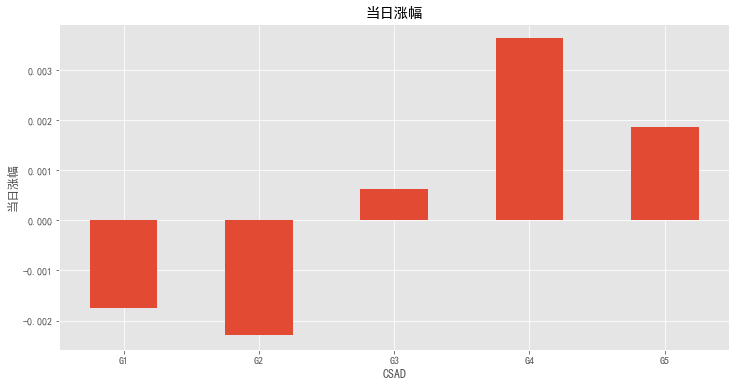

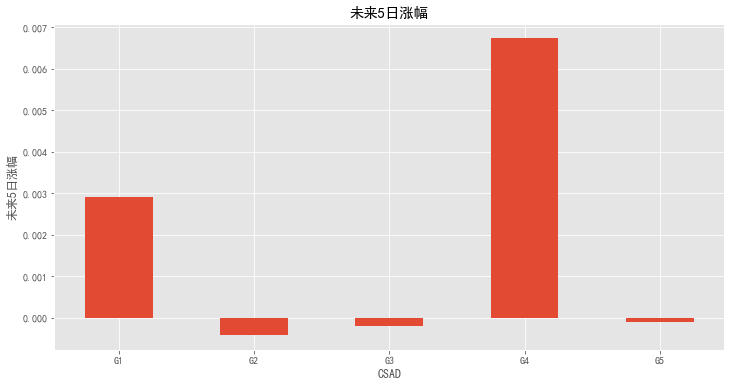

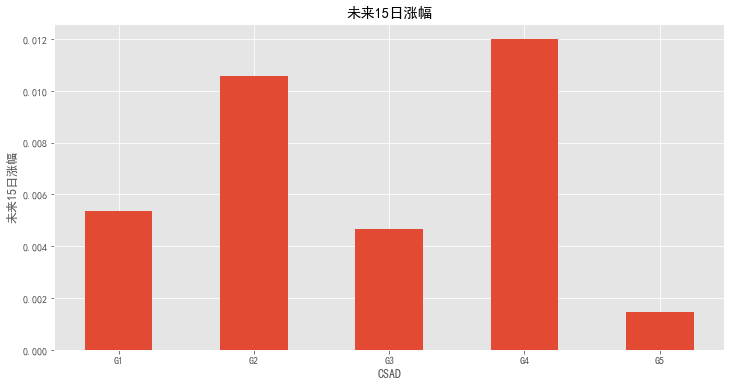

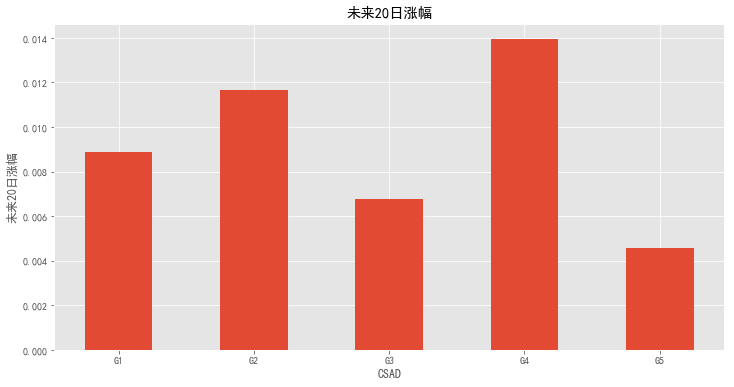

In [44]:
# 获取因子
factor_zbzs = get_factor(zbzs_datas, '399101.XSHE', 22)
# 分组
group_zbzs = get_group(factor_zbzs, 5, 'r_factor')

group_zbzs['未来5日涨幅'] = group_zbzs.close.pct_change(4).shift(-4)
group_zbzs['未来15日涨幅'] = group_zbzs.close.pct_change(14).shift(-14)
group_zbzs['未来20日涨幅'] = group_zbzs.close.pct_change(19).shift(-19)

# 绘图
plt.figure(1, figsize=(12, 6))
plt.title('当日涨幅')
group_plot(group_zbzs, '当日涨幅')
plt.figure(2, figsize=(12, 6))
plt.title('未来5日涨幅')
group_plot(group_zbzs, '未来5日涨幅')
plt.figure(3, figsize=(12, 6))
plt.title('未来15日涨幅')
group_plot(group_zbzs, '未来15日涨幅')
plt.figure(4, figsize=(12, 6))
plt.title('未来20日涨幅')
group_plot(group_zbzs, '未来20日涨幅')

### 中小板指数上的分组回测效果

<Figure size 432x288 with 0 Axes>

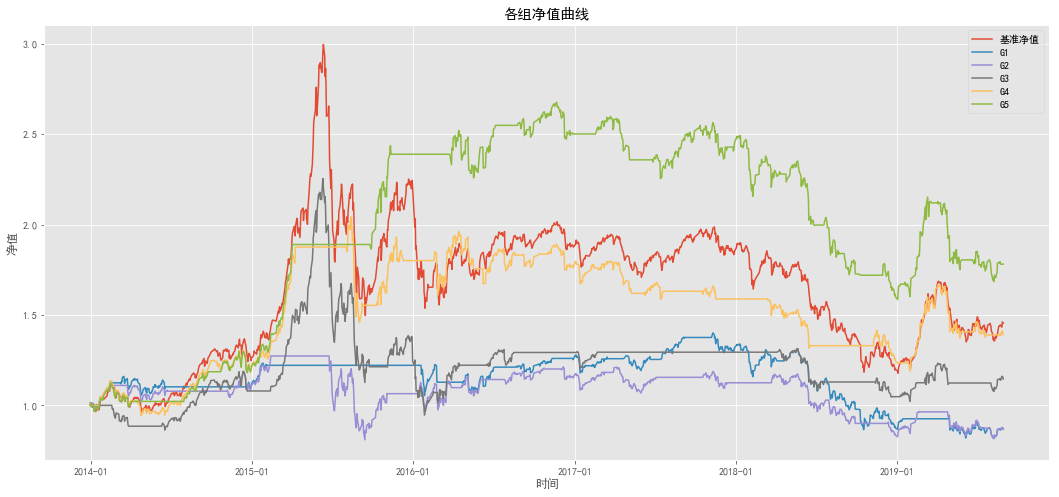

In [45]:
# 获取分组回测数据
cum_ret_dic, report = group_back_test(group_zbzs, 'GROUP', 20)
# 构建df
cum_df = pd.DataFrame(cum_ret_dic, index=factor_zbzs.index[:-1])
# 获取分组名称
group_list = cum_df.columns
# 画图
plt.figure()
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 1, 1)

for i in group_list:
    ax1.plot(cum_df[i], label=i)

ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('时间')
plt.ylabel('净值')
plt.title('各组净值曲线')
plt.show()

<Figure size 432x288 with 0 Axes>

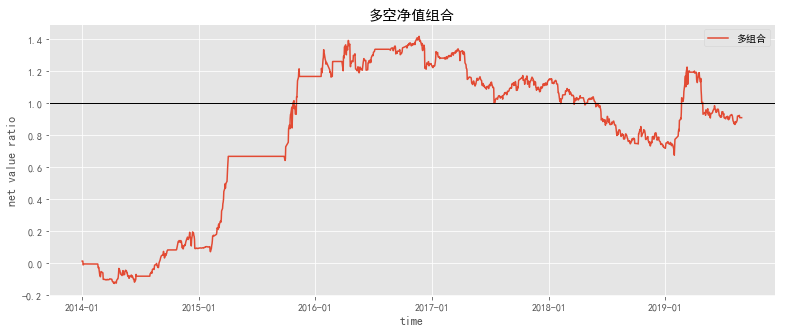

In [46]:
# 多空收益净值
d = cum_df['G5'] - cum_df['G1']
plt.figure()
fig = plt.figure(figsize=(13, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(d, label='多组合')
ax1.axhline(1.0, linestyle='-', color='black', lw=1)
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('net value ratio')
plt.title('多空净值组合')
plt.show()

分组的单调性较好，但稳定性不太理想

In [47]:
# 回测报告
pd.DataFrame(report).T

,夏普比率,年化收益率,日胜率,最大回撤,满仓天数,空仓天数,累计收益率
G1,-0.073,-2.38%,50.95%,41.64%,736,648,-12.91%
G2,-0.015,-2.46%,50.75%,36.44%,796,588,-13.32%
G3,0.22,2.39%,55.84%,58.04%,668,716,14.54%
G4,0.39,5.94%,53.81%,41.79%,866,518,39.29%
G5,0.68,10.58%,53.96%,40.80%,858,526,78.11%


### 中小板指数敏感性分析

通过敏感性分析我们可以看到在持有天数为**25**天时,夏普为<font color=Darkred>**0.67**</font>年化收益率为<font color=Darkred>**10.79%**</font>达到最优

In [48]:
# 夏普敏感性分析
sharpe_df = threshold_analysis(factor_zbzs,
                               threshold_col='r_factor',
                               params='sharpe')
# 收益率敏感性分析
ret_df = threshold_analysis(factor_zbzs,
                            threshold_col='r_factor',
                            params='ret')

print('夏普敏感性分析:')
display(HTML(sharpe_df.to_html()))
print('收率敏感性分析:')
display(HTML(ret_df.to_html()))

夏普敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,0.234493,0.306628,0.356705,0.401716,0.352142
554.2,0.119749,0.088895,0.182591,0.326514,0.313701
830.8,0.532049,0.310342,0.378942,0.516337,0.425004
1107.4,0.218446,0.462764,0.448659,0.677465,0.665997


收率敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,2.74%,4.69%,6.09%,7.38%,5.99%
554.2,0.07%,-0.87%,1.38%,5.24%,4.90%
830.8,7.75%,4.19%,5.79%,9.04%,7.19%
1107.4,1.95%,5.80%,6.11%,10.57%,10.79%


## 合成因子

试图通过等权重通过CSAD和指数收益率排名打分构建成类似因子一样的值进行回测，收益率单调性还不错

In [49]:
# 采用等权重法将改进的两个指标合成一个综合指标
def get_score(data):
    rank_data1=data[['r_csad']].rank(ascending=False)  #将csad因子按降序排名，排名越大越好
    rank_data2=data[['index_Nret']].rank(ascending=True)  #将index_ret升序排名，排名越大越好
    rank_data=pd.concat([rank_data1,rank_data2],axis=1)
    data['SCORE']=rank_data.mean(axis=1)  #等权重计算得分形成综合得分,得分越大越好
    return data

<Figure size 432x288 with 0 Axes>

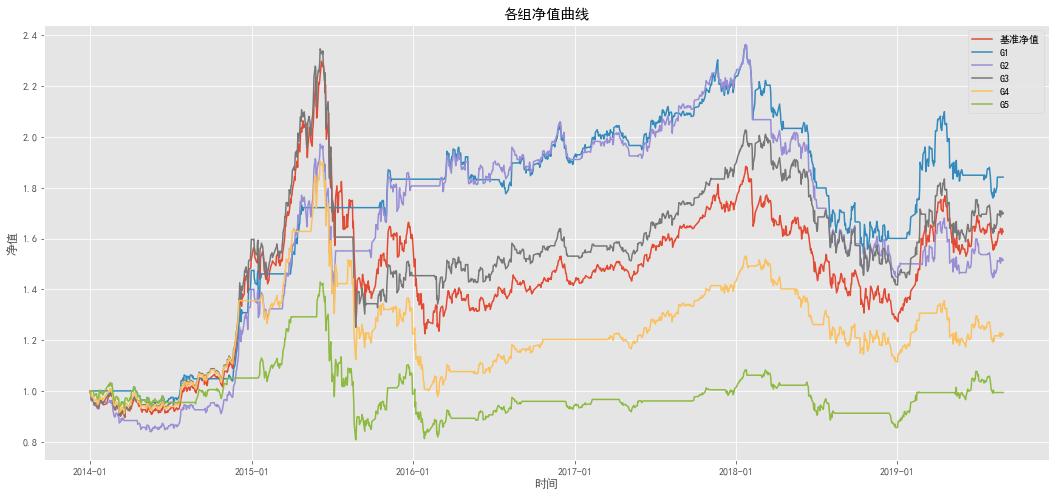

In [50]:
# 分组回测
test=get_score(factor_hs300)
g_test= get_group(test, 5, 'SCORE')

# 获取分组回测数据
cum_ret_dic, report = group_back_test(g_test, 'GROUP',20)
# 构建df
cum_df = pd.DataFrame(cum_ret_dic, index=factor_hs300.index[:-1])
# 获取分组名称
group_list = cum_df.columns
# 画图
plt.figure()
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 1, 1)

for i in group_list:
    ax1.plot(cum_df[i], label=i)

ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('时间')
plt.ylabel('净值')
plt.title('各组净值曲线')
plt.show()

In [51]:
# 回测报告
pd.DataFrame(report).T

,夏普比率,年化收益率,日胜率,最大回撤,满仓天数,空仓天数,累计收益率
G1,0.79,11.22%,53.37%,34.80%,830,554,84.16%
G2,0.47,7.52%,51.88%,38.87%,1091,293,51.62%
G3,0.54,9.68%,52.61%,46.73%,1205,179,70.00%
G4,0.27,3.56%,52.30%,48.72%,1044,340,22.25%
G5,0.09,-0.11%,52.03%,43.48%,765,619,-0.62%


In [52]:
# 夏普敏感性分析
sharpe_df = threshold_analysis(test,
                               threshold_col='r_factor',
                               params='sharpe')
# 收益率敏感性分析
ret_df = threshold_analysis(test,
                            threshold_col='r_factor',
                            params='ret')

print('夏普敏感性分析:')
display(HTML(sharpe_df.to_html()))
print('收率敏感性分析:')
display(HTML(ret_df.to_html()))

夏普敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,0.383144,0.472864,0.496967,0.489153,0.484300
554.2,0.255122,0.326271,0.411510,0.404458,0.424605
830.8,0.716314,0.911090,1.024472,0.918649,0.761617
1107.4,-0.022069,0.323722,0.418821,0.464447,0.589634


收率敏感性分析:


,持有5天,持有10天,持有15天,持有20天,持有25天
277.6,6.35%,8.67%,9.33%,9.14%,9.03%
554.2,3.15%,4.88%,6.99%,6.93%,7.48%
830.8,9.61%,14.28%,17.58%,16.22%,14.00%
1107.4,-0.82%,3.31%,4.88%,5.86%,8.05%


# 羊群效应在行业上的表现

我们选取了申万一级行业指数，将其按行业属性划分为周期、消费、成 长、金融五大类，通过 CCK 模型判断各申万一级行业指数成分股间是 否存在羊群效应，买入/卖出各大类行业中出现羊群效应的申万一级行业
指数。

策略步骤：计算向前 22 日（包括当日）每天的成分股组合截面绝对离散度 CSAD，OLS估计CCK模型中$R_{m,t}^2$,认为当日该组合存在羊群效应，根据22日内指数平均收益率的正负区分羊群效应发生时的市场趋势为上涨/下跌，买入/卖出标的指数并持仓22 交易日，持有期不重复开仓。

**ps：**<font color=Darkred><u>过滤指数中上市不足三月\st\当日停牌股票</u></font>

<table>
    <tr>
        <th>行业大类</th>
        <th><center>申万一级行业</center></th>
    </tr>
    <tr>
        <td rowspan='2'>周期</td>
        <td><center>采掘I, 化工I, 钢铁I, 有色金属I, 建筑建材I, 机械设备I, 交运设备I, 信息设备I</center></td>
    </tr>
    <tr>
        <td><center>公用事业I, 交通运输I, 房地产I, 综合I, 建筑材料I, 建筑装饰I, 电气设备I,机械设备I</center></td>
    </tr>
    <tr>
        <td>消费</td>
        <td><center>农林牧渔I, 家用电器I, 食品饮料I, 纺织服装I, 轻工制造I, 医药生物I, 商业贸易I,休闲服务I, 汽车I</center></td>
    </tr>
    <tr>
        <td>成长</td>
        <td><center>电子I, 信息服务I, 国防军工I, 计算机I, 传媒I, 通信I</center></td>
    </tr>
    <tr>
        <td>金融</td>
        <td><center>金融服务I, 银行I, 非银金融I</center></td>
    </tr>
    <tr>
        <td></td>
    </tr>
</table>

In [2]:
industries_group_dic= dict(
        zip([
            '801020', '801030', '801040', '801050', '801060', '801730',
            '801070', '801090', '801180', '801160','801100','801170','801230','801710','801720','801890']+['801880', '801110',
            '801130', '801120', '801150', '801210', '801140', '801010','801200']+
            ['801080', '801770', '801760', '801750', '801740','801220']+['801780',
            '801790', '801190'],\
            ['周期'] * 16 + ['消费'] * 9 + ['成长'] * 6 + ['金融'] * 3))

In [3]:
# 获取各行业指数信息
def industry_index_close(start, end):

    begin = get_trade_days(end_date=start, count=22)[0]

    # 获取申万一级行业指数代码
    industries_id = get_industries(name='sw_l1').index.tolist()
    # 防止超限
    limit_row = len(get_trade_days(start_date=start, end_date=end))
    if limit_row > 3000:
        print('大于查询限制')
    temp = []
    for industry_code in industries_id:
        q = query(finance.SW1_DAILY_PRICE.date, finance.SW1_DAILY_PRICE.code,
                  finance.SW1_DAILY_PRICE.name, finance.SW1_DAILY_PRICE.close,
                  finance.SW1_DAILY_PRICE.change_pct).filter(
                      finance.SW1_DAILY_PRICE.code == industry_code,
                      finance.SW1_DAILY_PRICE.date >= begin,
                      finance.SW1_DAILY_PRICE.date <= end)
        df = finance.run_query(q)
        temp.append(df)

    datas = pd.concat(temp)
    # 储存数据
    pkl_file = open('industry_index_close.pkl', 'wb')
    pickle.dump(datas, pkl_file)
    print('以储存数据：industry_index_close.pkl')
    return datas

In [4]:
# 获取每日申万一级行业成分股
'''
区间日期
------
return dict
dic：key tradeDate value (industry_code,code)
'''


def get_industry_dic(start, end):
    import itertools
    # 获取申万一级行业指数代码
    industries_id = get_industries(name='sw_l1').index.tolist()
    begin = get_trade_days(end_date=start, count=22)[0]
    # 获取交易日期
    trade_list = [
        x.strftime('%Y-%m-%d')
        for x in get_trade_days(start_date=begin, end_date=end)
    ]

    industry_dic = {}
    for day in trade_list:
        temp = []
        print('success', day)
        for industriesId in industries_id:
            stocks = get_industry_stocks(industriesId, date=day)
            if len(stocks) > 0:
                temp.extend(list(itertools.product([industriesId], stocks)))
        industry_dic[day] = temp

    # 储存信息
    pkl_file = open('industry_dic.pkl', 'wb')
    pickle.dump(industry_dic, pkl_file)

    print('以储存字典信息：industry_dic.pkl')
    return industry_dic


# 通过字典数据下载行业股票每日收盘价
'''
dic：key tradeDate value (industry_code,code)
-------
return df
|index-code|index-code|close|industry_code

过滤当日未交易，上市不足三月股票
'''


def get_industry_daily(dic):
    temp = []
    for day in dic.keys():

        # 过滤多个行业所属股票
        df1 = pd.DataFrame(dic[day], columns=['industry_code', 'code'])
        df1.drop_duplicates('code', inplace=True)

        # 获取当日股票列表
        stocks = df1.code.values.tolist()
        # 转为字典
        df1.set_index('code', inplace=True)
        industry_dic = df1.to_dict('index')
        # 过滤上市不足三月股票
        stocks = filter_now_share(stocks, begin_date=day, n=3 * 30)

        # 过滤当日未交易股票
        stocks = filter_paused_stocks(stocks, begin_date=day)
        # 获取股票信息
        df = get_price(stocks, end_date=day, count=1,
                       fields='close').to_frame()

        df.index.names = ['date', 'code']

        # 获取过滤后的股票
        idx = pd.IndexSlice
        df = df.loc[idx[:, stocks], :]
        # 添加行业代码
        ## 如果未查询到则为0
        df['industry_code'] = list(
            map(lambda x: industry_dic.get(x, '0')['industry_code'],
                df.index.get_level_values(1)))

        temp.append(df)
        print('success', day)
    # 合并数据
    industry_daily = pd.concat(temp)
    # 储存数据
    pkl_file = open('industry_daily.pkl', 'wb')
    pickle.dump(industry_daily, pkl_file)
    print('储存下载数据：industry_daily.pkl')
    return industry_daily

In [5]:
# 设置基准指标
def get_benchmark(index, start, end):
    benchmark = get_price(index,
                          start_date=start,
                          end_date=end,
                          fields='close')
    ret = benchmark.close.pct_change()
    ret = ret.fillna(0)
    position=np.ones(len(ret))
    cum_ret = (1 + ret).cumprod()
    # 最大回撤
    max_nv = np.maximum.accumulate(cum_ret)
    mdd = -np.min(cum_ret / max_nv - 1)
    # 胜率
    winning_ratio = np.sum(np.where(ret > 0, 1, 0)) / np.sum(position)
    # 计算年化收益率
    annual_ret = cum_ret[-1]**(240 / (len(cum_ret) - 5)) - 1
    # 计算累计收益率
    cum_ret_rate = cum_ret[-1] - 1
    # 夏普
    sharpe = ret.mean() / ret.std() * np.sqrt(240)

    df = pd.DataFrame(
        {
            '年化收益率': '{:.2%}'.format(annual_ret),
            '累计收益率': '{:.2%}'.format(cum_ret_rate),
            '胜率': '{:.2%}'.format(winning_ratio),
            '开仓天数': np.sum(position),
            '最大回撤': '{:.2%}'.format(mdd),
            '夏普': '{:.2}'.format(sharpe)
        },
        index=['benchmark'])
    cum_ret.name = 'benchmark'
    return df, cum_ret

In [9]:
start = '2014-01-01'
end = '2019-08-31'
# 获取行业成分股数据
industry_dic = get_industry_dic(start, end)
# 获取行业指数数据
industry_index_data = industry_index_close(start, end)
# 获取成分股收盘数据
industry_daily = get_industry_daily(industry_dic)

以储存数据：industry_close.pkl
success 2013-12-02
success 2013-12-03
success 2013-12-04
success 2013-12-05
success 2013-12-06
success 2013-12-09
success 2013-12-10
success 2013-12-11
success 2013-12-12
success 2013-12-13
success 2013-12-16
success 2013-12-17
success 2013-12-18
success 2013-12-19
success 2013-12-20
success 2013-12-23
success 2013-12-24
success 2013-12-25
success 2013-12-26
success 2013-12-27
success 2013-12-30
success 2013-12-31
success 2014-01-02
success 2014-01-03
success 2014-01-06
success 2014-01-07
success 2014-01-08
success 2014-01-09
success 2014-01-10
success 2014-01-13
success 2014-01-14
success 2014-01-15
success 2014-01-16
success 2014-01-17
success 2014-01-20
success 2014-01-21
success 2014-01-22
success 2014-01-23
success 2014-01-24
success 2014-01-27
success 2014-01-28
success 2014-01-29
success 2014-01-30
success 2014-02-07
success 2014-02-10
success 2014-02-11
success 2014-02-12
success 2014-02-13
success 2014-02-14
success 2014-02-17
success 2014-02-18
succes

success 2015-09-01
success 2015-09-02
success 2015-09-07
success 2015-09-08
success 2015-09-09
success 2015-09-10
success 2015-09-11
success 2015-09-14
success 2015-09-15
success 2015-09-16
success 2015-09-17
success 2015-09-18
success 2015-09-21
success 2015-09-22
success 2015-09-23
success 2015-09-24
success 2015-09-25
success 2015-09-28
success 2015-09-29
success 2015-09-30
success 2015-10-08
success 2015-10-09
success 2015-10-12
success 2015-10-13
success 2015-10-14
success 2015-10-15
success 2015-10-16
success 2015-10-19
success 2015-10-20
success 2015-10-21
success 2015-10-22
success 2015-10-23
success 2015-10-26
success 2015-10-27
success 2015-10-28
success 2015-10-29
success 2015-10-30
success 2015-11-02
success 2015-11-03
success 2015-11-04
success 2015-11-05
success 2015-11-06
success 2015-11-09
success 2015-11-10
success 2015-11-11
success 2015-11-12
success 2015-11-13
success 2015-11-16
success 2015-11-17
success 2015-11-18
success 2015-11-19
success 2015-11-20
success 2015

success 2017-06-15
success 2017-06-16
success 2017-06-19
success 2017-06-20
success 2017-06-21
success 2017-06-22
success 2017-06-23
success 2017-06-26
success 2017-06-27
success 2017-06-28
success 2017-06-29
success 2017-06-30
success 2017-07-03
success 2017-07-04
success 2017-07-05
success 2017-07-06
success 2017-07-07
success 2017-07-10
success 2017-07-11
success 2017-07-12
success 2017-07-13
success 2017-07-14
success 2017-07-17
success 2017-07-18
success 2017-07-19
success 2017-07-20
success 2017-07-21
success 2017-07-24
success 2017-07-25
success 2017-07-26
success 2017-07-27
success 2017-07-28
success 2017-07-31
success 2017-08-01
success 2017-08-02
success 2017-08-03
success 2017-08-04
success 2017-08-07
success 2017-08-08
success 2017-08-09
success 2017-08-10
success 2017-08-11
success 2017-08-14
success 2017-08-15
success 2017-08-16
success 2017-08-17
success 2017-08-18
success 2017-08-21
success 2017-08-22
success 2017-08-23
success 2017-08-24
success 2017-08-25
success 2017

success 2019-03-22
success 2019-03-25
success 2019-03-26
success 2019-03-27
success 2019-03-28
success 2019-03-29
success 2019-04-01
success 2019-04-02
success 2019-04-03
success 2019-04-04
success 2019-04-08
success 2019-04-09
success 2019-04-10
success 2019-04-11
success 2019-04-12
success 2019-04-15
success 2019-04-16
success 2019-04-17
success 2019-04-18
success 2019-04-19
success 2019-04-22
success 2019-04-23
success 2019-04-24
success 2019-04-25
success 2019-04-26
success 2019-04-29
success 2019-04-30
success 2019-05-06
success 2019-05-07
success 2019-05-08
success 2019-05-09
success 2019-05-10
success 2019-05-13
success 2019-05-14
success 2019-05-15
success 2019-05-16
success 2019-05-17
success 2019-05-20
success 2019-05-21
success 2019-05-22
success 2019-05-23
success 2019-05-24
success 2019-05-27
success 2019-05-28
success 2019-05-29
success 2019-05-30
success 2019-05-31
success 2019-06-03
success 2019-06-04
success 2019-06-05
success 2019-06-06
success 2019-06-10
success 2019

In [6]:
# 读取行业成分股相关数据
pkl_file = open('industry_daily.pkl', 'rb')
industry_daily = pickle.load(pkl_file)

# 读取行业指数
pkl_file = open('industry_index_close.pkl', 'rb')
industry_index_data = pickle.load(pkl_file)

In [7]:
# ind convert str
industry_index_data.code = industry_index_data.code.astype(str)
# 添加大类
## 指数数据
industry_index_data['category_'] = industry_index_data.code.apply(
    lambda x: industries_group_dic[x])
## 成分股数据
industry_daily['category_'] = industry_daily['industry_code'].apply(
    lambda x: industries_group_dic[x])

In [8]:
# 计算csad
industry_index_data[
    'change_pct'] = industry_index_data.change_pct / 100  # change_pct单位为%
industry_index_ret = industry_index_data.groupby(['date', 'category_'
                                                  ]).agg({'change_pct': mean})

In [9]:
# 计算每日收益率(耗时较多。。。)
#industry_daily=industry_daily.reset_index()
#industry_daily['pct_change']=industry_daily.groupby(['code','date'])['close'].transform(lambda x:x.pct_change())

In [10]:
# 计算日收益率
## industry_daily multi index
ret_data = industry_daily[['close']].unstack()
ret_data = ret_data.pct_change()

ret_data = ret_data.stack()
ret_data.columns = ['ret']
# 添加ret
industry_daily['ret'] = ret_data

industry_daily = industry_daily.reset_index()
industry_daily['date'] = industry_daily['date'].apply(
    lambda x: x.strftime('%Y-%m-%d'))
# 行业指数收益率index转换
industry_index_ret = industry_index_ret.reset_index()

combine_data = pd.merge(industry_daily,
                        industry_index_ret,
                        on=['date', 'category_'])
combine_data = combine_data[combine_data.date > '2013-12-02']

In [11]:
# 计算差值的绝对值
combine_data['diff_'] = abs(combine_data.ret - combine_data.change_pct)
# 计算csad
csad = combine_data.groupby(['date', 'category_']).agg({'diff_': mean})
csad.columns = ['CSAD']

industry_index_ret = industry_index_ret.set_index(['date', 'category_'])
csad['index_ret'] = industry_index_ret
csad['index_ret_2'] = csad['index_ret']**2

# 调整index级别
csad = csad.swaplevel('category_', 'date')

In [21]:
# 计算回归系数
def lstsq(df):

    x = df[['abs_index_ret', 'index_ret_2']]
    y = df[['CSAD']]
    return np.linalg.lstsq(x, y)[0][1]


singal_df = []
idx = pd.IndexSlice
category_list = csad.index.levels[0]
# 取得回归系数
for i in category_list:
    regression_df = csad.loc[idx[i, :]]
    # 回归时 指数收益为绝对值
    regression_df['abs_index_ret'] = abs(regression_df['index_ret'])
    temp = []
    # 滚动计算
    for r in range(len(regression_df) - 21):
        slice_data = regression_df[r:r + 21]
        temp.extend(lstsq(slice_data))
    # 添加回归系数
    regression_df['beta'] = np.r_[np.zeros(21), np.array(temp)]
    # 添加大类
    regression_df['categroy_'] = i
    # 添加先后
    regression_df['singal'] = (regression_df.beta <
                               0) & (regression_df.index_ret > 0)
    # 计算22日平均收益率
    regression_df['rolling_ret']=regression_df['index_ret'].rolling(21).mean()
    # 滚动信号
    regression_df['rolling_singal']=(regression_df.beta <
                               0) & (regression_df.rolling_ret > 0)
    # 根据指数22日平均收益开仓
    singal_df.append(regression_df)

industry_singal_df = pd.concat(singal_df)

## 回测效果

市场趋势为上涨时策略在行业指数上的平均表现如下所示（分年度表现 见附录）。市场趋势方面，市场存在上涨趋势时，羊群效应策略效果在周期行业较为明显。市值风格方面，高市值行业回测结果弱于低市值行业，金融型行业平均收益率为 10.20%，胜率 49.74%。行业属性方面，成长型行业表现较好，平均收益率18.29%，胜率 54.79%

各指数风险指标:


,年化收益率,累计收益率,胜率,开仓天数,最大回撤,夏普
周期,15.51%,131.79%,57.27%,784.0,29.55%,0.93
成长,18.29%,166.22%,54.79%,752.0,32.02%,0.94
消费,16.62%,145.02%,57.28%,817.0,25.30%,1.0
金融,10.20%,76.12%,49.74%,774.0,28.19%,0.6
benchmark,7.87%,55.54%,52.42%,1404.0,46.70%,0.44


<Figure size 432x288 with 0 Axes>

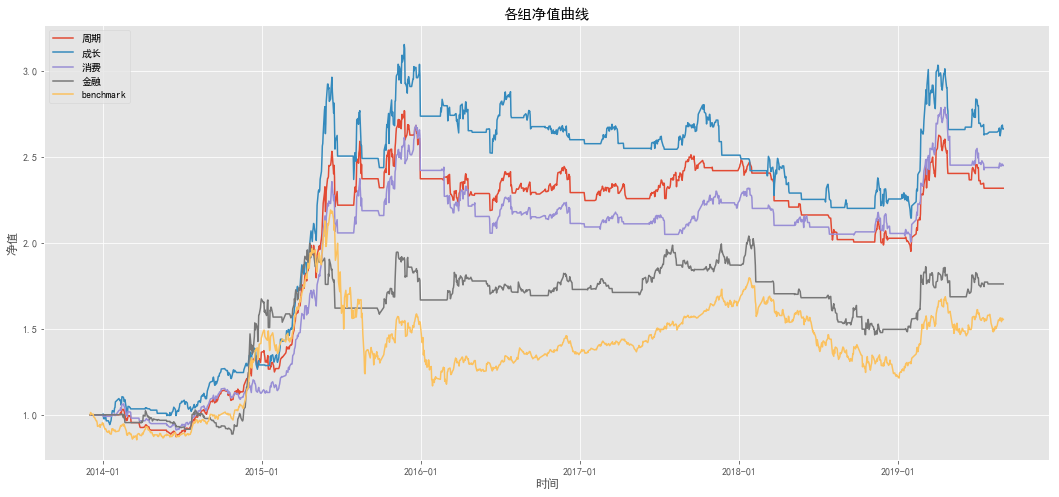

In [24]:
# 根据指数22日平均收益开仓
# 储存回测风险指标
report_df = pd.DataFrame()
# 储存净值用于作图
net_dic = {}

for k, group_df in industry_singal_df.groupby('categroy_'):
    group_df.index = group_df.index.astype('datetime64')
    ret = group_df['index_ret'].shift(-1)

    position = group_df['rolling_singal'] * np.ones(len(group_df['rolling_singal']))
    x_ret = np.nan_to_num(ret * position)
    cum_ret = (1 + x_ret).cumprod()

    # 最大回撤
    max_nv = np.maximum.accumulate(cum_ret)
    mdd = -np.min(cum_ret / max_nv - 1)
    # 胜率
    winning_ratio = np.sum(np.where(x_ret > 0, 1, 0)) / np.sum(position)
    # 计算年化收益率
    annual_ret = cum_ret[-1]**(240 / (len(cum_ret) - 5)) - 1
    # 计算累计收益率
    cum_ret_rate = cum_ret[-1] - 1
    # 夏普
    sharpe = x_ret.mean() / x_ret.std() * np.sqrt(240)

    df = pd.DataFrame(
        {
            '年化收益率': '{:.2%}'.format(annual_ret),
            '累计收益率': '{:.2%}'.format(cum_ret_rate),
            '胜率': '{:.2%}'.format(winning_ratio),
            '开仓天数': np.sum(position),
            '最大回撤': '{:.2%}'.format(mdd),
            '夏普': '{:.2}'.format(sharpe)
        },
        index=[k])
    report_df = report_df.append(df)

    # 储存净值曲线
    net_dic[k] = cum_ret

# 设置基准
add_r, add_nev = get_benchmark('000300.XSHG', min(industry_singal_df.index),
                               max(industry_singal_df.index))
report_df = pd.concat([report_df, add_r])  # 添加基准
# 查看风险指标
print('各指数风险指标:')

display(HTML(report_df.to_html()))

nev_df = pd.DataFrame(net_dic, index=group_df.index)
nev_df = nev_df.join(add_nev)  # 添加基准
# 画图
plt.figure()
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 1, 1)

for i in nev_df.columns:
    ax1.plot(nev_df[i], label=i)

ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.legend(loc='best')
plt.xlabel('时间')
plt.ylabel('净值')
plt.title('各组净值曲线')
plt.show()